In [ ]:
import efel

from bluepy.v2 import Simulation,Circuit,Cell

from bluepy.v2.enums import Synapse

from os import path

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import h5py
import pickle


In [ ]:
#Convert reports from bbp format to h5
#bash step1_convert_bbp2h5.sh OutputRoot

#Get INa and ATP for correlation analysis
#modify marked line when run
#python analysis/ina_atp_firingSoma.py percent_gids sim_f out_f_name duration_in_seconds
#python ina_atp_firingSoma.py 10 /gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/diff_pulses/amp1/BlueConfig /gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/diff_pulses/amp1/atpFromINa.tsv 1 # 1 because 1000 x 1 = full duration

#python ina_500.py 10 /gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/diff_pulses/amp1/BlueConfig /gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/diff_pulses/amp1/atpFromINa500.tsv 2 # 2 because 500 x 2 = full duration
#python atp_rate.py 10 /gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/diff_pulses/amp1/BlueConfig /gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/diff_pulses/amp1/atpRate.tsv 2 


#Get all efel
#python getAllEfel.py /gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/diff_pulses/amp1/BlueConfig /gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/diff_pulses/amp1/efel_amp1_f1.pickle 1
#python getAllEfel.py /gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/diff_pulses/amp1/BlueConfig /gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/diff_pulses/amp1/efel_amp1_f2.pickle 2

In [2]:
circuit_f = '/gpfs/bbp.cscs.ch/project/proj64/circuits/O1.v6a/20181207/CircuitConfig'

c = Circuit(circuit_f)
mc2_cells = c.cells.get({'$target': 'mc2_Column'}, properties=[Cell.X, Cell.Y, Cell.Z,Cell.SYNAPSE_CLASS,Cell.LAYER,Cell.ETYPE,Cell.MTYPE])
mc2gidsids = {k: v for k, v in enumerate(mc2_cells.index)}


In [3]:
atpFromIna = pd.DataFrame()

for i in range(10):
    #atpinafile = "/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/diff_pulses/amp" + str(i+1) + "/atpFromINa.tsv"
    atpinafile = "/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/diff_pulses/amp" + str(i+1) + "/atpFromINa500.tsv" # in case of ina_500
    
    atpFromInaSub = pd.read_csv(atpinafile,sep='\t',index_col=0)
    
    if (i+1 == 1):
        atpFromInaSub['amp'] = 10
    elif (i+1 == 2):
        atpFromInaSub['amp'] = 100
    elif (i+1 == 3):
        atpFromInaSub['amp'] = 200
    elif (i+1 == 4):
        atpFromInaSub['amp'] = 50
    elif (i+1 == 5):
        atpFromInaSub['amp'] = 150
    elif (i+1 == 6):
        atpFromInaSub['amp'] = 75
    elif (i+1 == 7):
        atpFromInaSub['amp'] = 125
    elif (i+1 == 8):
        atpFromInaSub['amp'] = 25
    elif (i+1 == 9):
        atpFromInaSub['amp'] = 5
    elif (i+1 == 10):
        atpFromInaSub['amp'] = 1
    else:
        print("check i")
        
    atpFromIna = atpFromIna.append(atpFromInaSub,ignore_index=True)
    
atpFromIna = atpFromIna.reset_index(drop=True)


atpFromIna['atp_1'] = atpFromIna['atp_1'].abs()
atpFromIna['atp_2'] = atpFromIna['atp_2'].abs()

atpFromIna['atpPerVol_1'] = atpFromIna['atp_1']/atpFromIna['cells_volumes_um3']
atpFromIna['atpPerVol_2'] = atpFromIna['atp_2']/atpFromIna['cells_volumes_um3'] # in case of ina_500


In [4]:
atpFromIna.head()

gid  cells_volumes_um3   cells_areas         atp_1     inaSum_1  \
0  147761       21720.364520  59517.611050  6.598545e+12 -3172.727159   
1  147789       21298.106965  58540.931435  6.728823e+12 -3235.367656   
2  147792       27171.072777  51461.060262  2.131337e+12 -1024.794304   
3  147794        7496.108039  21471.106164  1.466280e+12  -705.020021   
4  147796       23186.915375  55994.339792  7.641386e+12 -3674.148476   

          atp_2     inaSum_2           x            y           z  \
0  3.776118e+12 -1815.641421  517.843059   727.718341  541.055042   
1  3.310480e+12 -1591.752537  544.045771   769.493658  639.774117   
2  2.245086e+12 -1079.487495  490.670078   928.125356  619.340420   
3  1.569652e+12  -754.723475  315.838227  1037.090485  769.339527   
4  6.010440e+12 -2889.953393  471.725456   852.072421  612.918273   

  synapse_class  layer   etype     mtype      etype_mtype  atp_meanconc_1  \
0           EXC      5  cADpyr  L5_TPC:A  cADpyr_L5_TPC:A        1.246413   
1           EXC      5  cADpyr  L5_TPC:A  cADpyr_L5_TPC:A        1.240723   
2           EXC      5  cADpyr  L5_TPC:A  cADpyr_L5_TPC:A        1.153453   
3           EXC      5  cADpyr  L5_TPC:A  cADpyr_L5_TPC:A        1.127437   
4           EXC      5  cADpyr  L5_TPC:A  cADpyr_L5_TPC:A        0.896003   

   atp_meanconc_2  amp   atpPerVol_1   atpPerVol_2  
0        0.913197   10  3.037953e+08  1.738515e+08  
1        0.899632   10  3.159352e+08  1.554354e+08  
2        0.708916   10  7.844140e+07  8.262781e+07  
3        0.626952   10  1.956055e+08  2.093956e+08  
4        0.117306   10  3.295560e+08  2.592169e+08

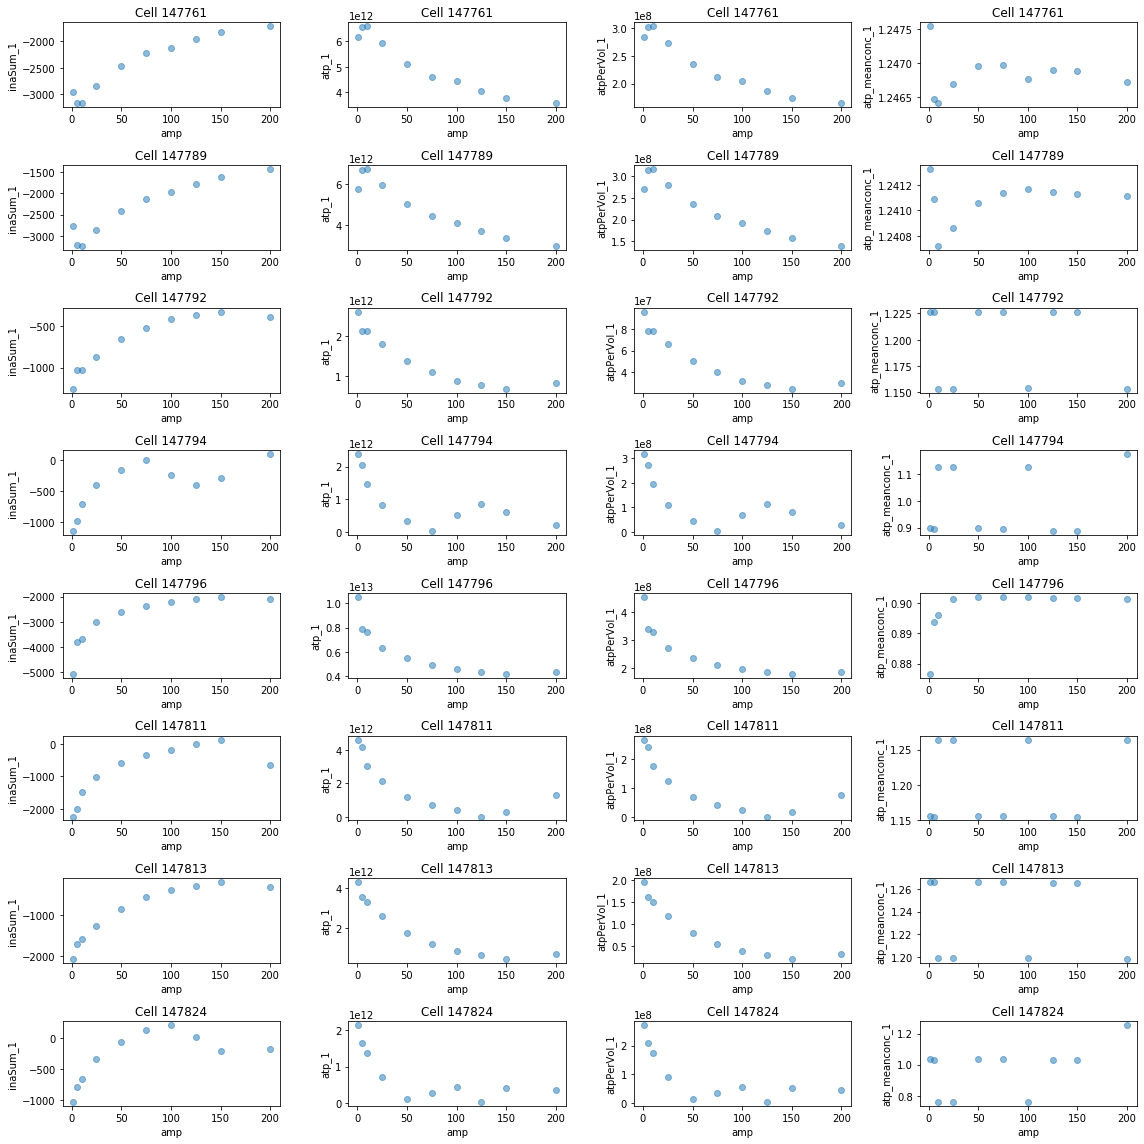

In [6]:
fig, axs = plt.subplots(8,4,figsize=(16,16))

for i,c in enumerate(['inaSum_1','atp_1','atpPerVol_1','atp_meanconc_1']):
        
    x = i % 4
     
    for j,gids in enumerate(atpFromIna.loc[atpFromIna['etype']=='cADpyr','gid'][0:8]):
        
        y = j % 8
        
        axs[y, x].plot(atpFromIna.loc[atpFromIna['gid']==gids,'amp'],atpFromIna.loc[atpFromIna['gid']==gids,c], marker='.', linestyle='', ms=12,  alpha=0.5)
        axs[y, x].set_title(f'Cell {gids}')
        axs[y, x].set(xlabel='amp', ylabel=c)

fig.tight_layout()

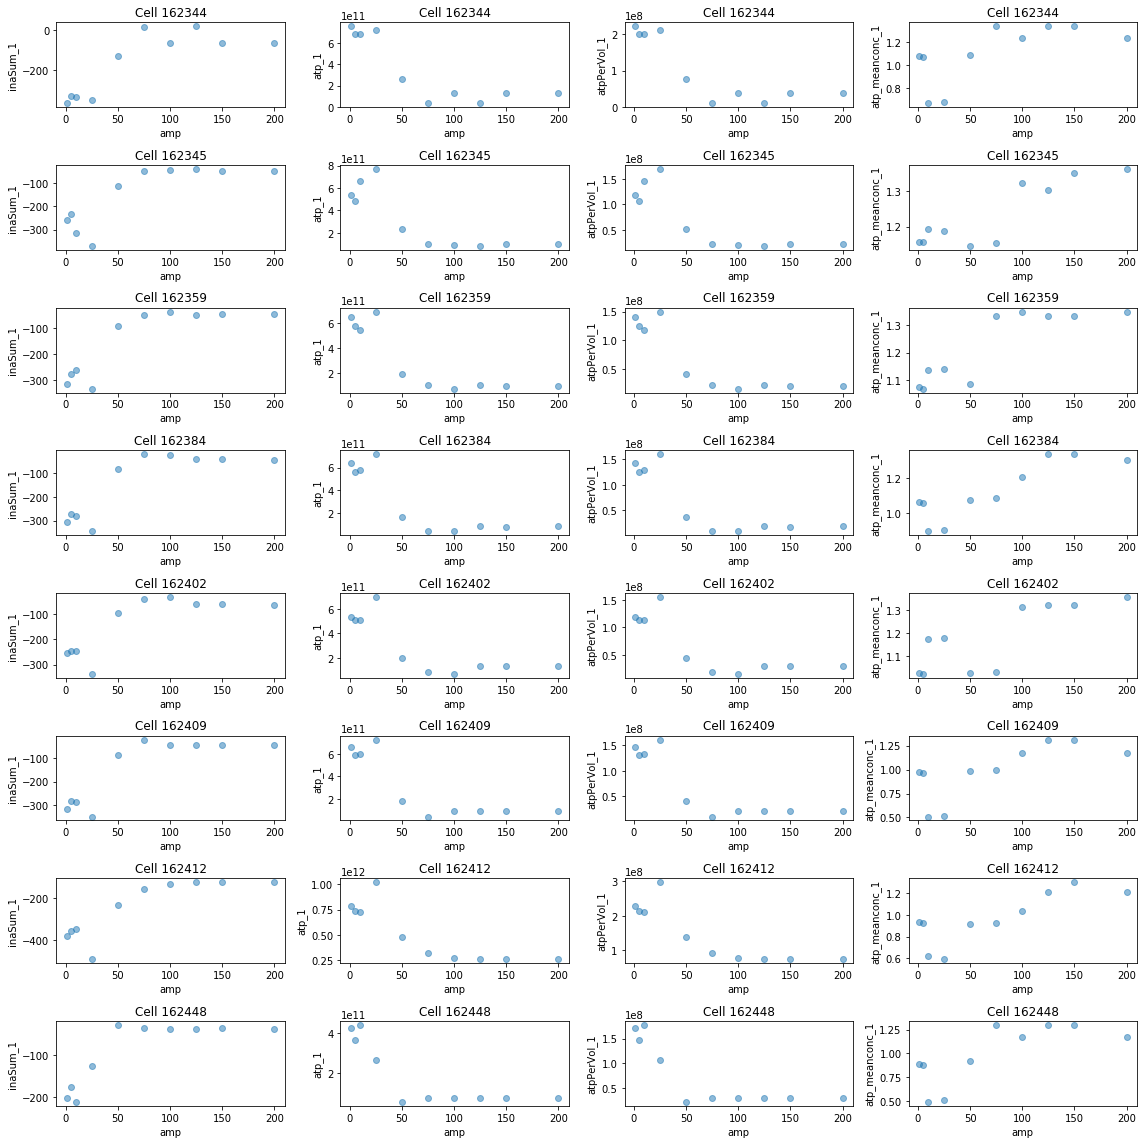

In [7]:
fig, axs = plt.subplots(8,4,figsize=(16,16))

for i,c in enumerate(['inaSum_1','atp_1','atpPerVol_1','atp_meanconc_1']):
        
    x = i % 4
     
    for j,gids in enumerate(atpFromIna.loc[atpFromIna['etype']=='bAC','gid'][0:8]):
        
        y = j % 8
        
        axs[y, x].plot(atpFromIna.loc[atpFromIna['gid']==gids,'amp'],atpFromIna.loc[atpFromIna['gid']==gids,c], marker='.', linestyle='', ms=12, alpha=0.5)
        axs[y, x].set_title(f'Cell {gids}')
        axs[y, x].set(xlabel='amp', ylabel=c)

fig.tight_layout()

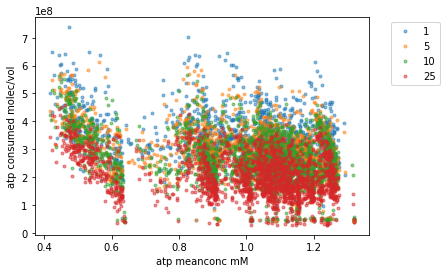

In [22]:
groups = atpFromIna.loc[(atpFromIna['etype']=='cADpyr') & (atpFromIna['amp'].isin([1,5,10,25])),:].groupby('amp')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group['atp_meanconc_1'], group['atpPerVol_1'], marker='.', linestyle='',label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_xlabel('atp meanconc mM')
ax.set_ylabel('atp consumed molec/vol') 

plt.show()


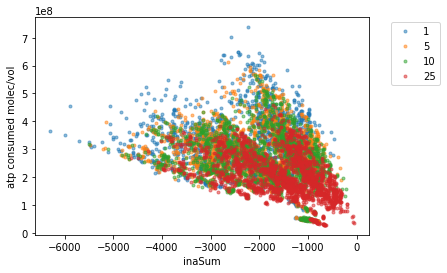

In [25]:
groups = atpFromIna.loc[(atpFromIna['etype']=='cADpyr') & (atpFromIna['amp'].isin([1,5,10,25])),:].groupby('amp')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group['inaSum_1'], group['atpPerVol_1'], marker='.', linestyle='',label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_xlabel('inaSum')
ax.set_ylabel('atp consumed molec/vol') 

plt.show()


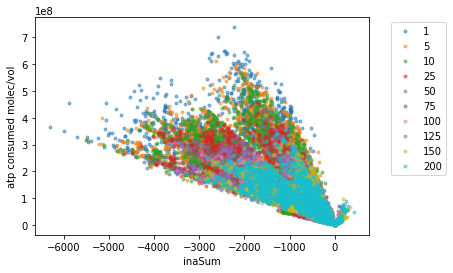

In [26]:
groups = atpFromIna.loc[atpFromIna['etype']=='cADpyr',:].groupby('amp')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group['inaSum_1'], group['atpPerVol_1'], marker='.', linestyle='',label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_xlabel('inaSum')
ax.set_ylabel('atp consumed molec/vol') 

plt.show()


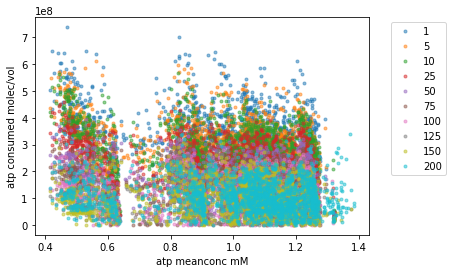

In [20]:
groups = atpFromIna.loc[atpFromIna['etype']=='cADpyr',:].groupby('amp')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group['atp_meanconc_1'], group['atpPerVol_1'], marker='.', linestyle='',label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_xlabel('atp meanconc mM')
ax.set_ylabel('atp consumed molec/vol') 

plt.show()


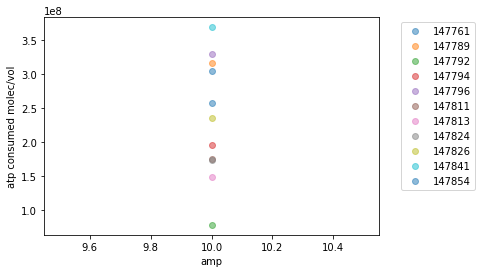

In [8]:
groups = atpFromIna.loc[0:10,:].loc[atpFromIna['etype']=='cADpyr',:].groupby('gid')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group['amp'], group['atpPerVol_1'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_xlabel('amp')
ax.set_ylabel('atp consumed molec/vol') 

plt.show()


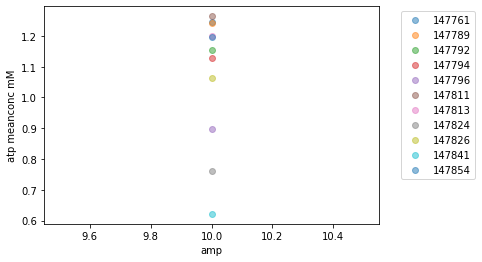

In [9]:
groups = atpFromIna.loc[0:10,:].loc[atpFromIna['etype']=='cADpyr',:].groupby('gid')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group['amp'], group['atp_meanconc_1'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_xlabel('amp')
ax.set_ylabel('atp meanconc mM') 

plt.show()


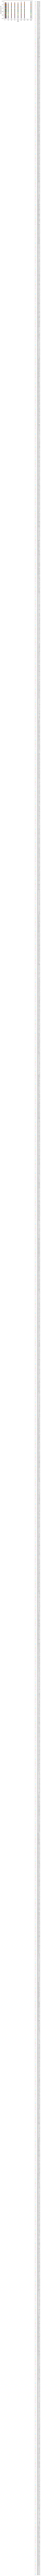

In [13]:
groups = atpFromIna.loc[atpFromIna['etype']=='cADpyr',:].groupby('gid')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group['amp'], group['atp_meanconc_1'].abs(), marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_xlabel('amp')
ax.set_ylabel('atp meanconc mM') 

plt.show()


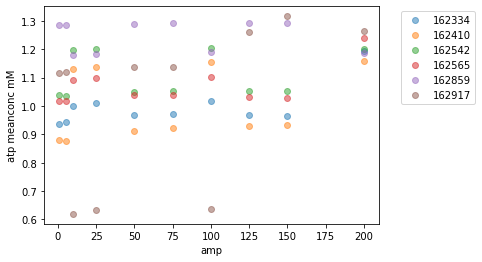

In [14]:
groups = atpFromIna.loc[atpFromIna['etype']=='cSTUT',:].groupby('gid')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group['amp'], group['atp_meanconc_1'].abs(), marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_xlabel('amp')
ax.set_ylabel('atp meanconc mM') 

plt.show()


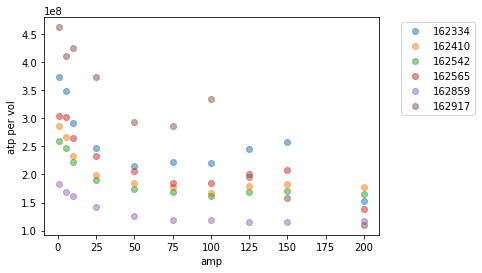

In [24]:
groups = atpFromIna.loc[atpFromIna['etype']=='cSTUT',:].groupby('gid')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group['amp'], group['atpPerVol_1'].abs(), marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_xlabel('amp')
ax.set_ylabel('atp per vol') 

plt.show()


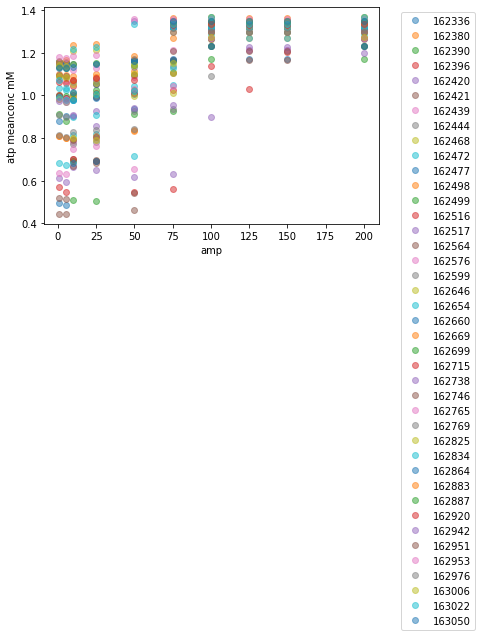

In [15]:
groups = atpFromIna.loc[atpFromIna['etype']=='cACint',:].groupby('gid')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group['amp'], group['atp_meanconc_1'].abs(), marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_xlabel('amp')
ax.set_ylabel('atp meanconc mM') 

plt.show()


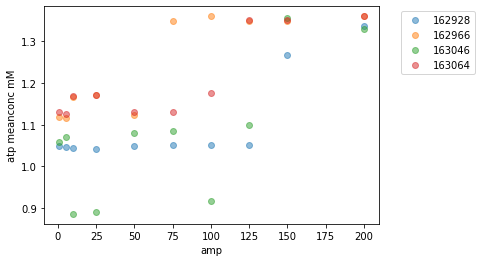

In [25]:
groups = atpFromIna.loc[atpFromIna['etype']=='cNAC',:].groupby('gid')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group['amp'], group['atp_meanconc_1'].abs(), marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_xlabel('amp')
ax.set_ylabel('atp meanconc mM') 

plt.show()


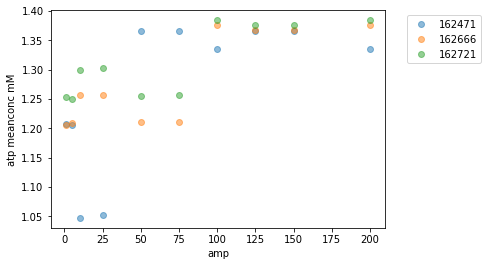

In [26]:
groups = atpFromIna.loc[atpFromIna['etype']=='dNAC',:].groupby('gid')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group['amp'], group['atp_meanconc_1'].abs(), marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_xlabel('amp')
ax.set_ylabel('atp meanconc mM') 

plt.show()


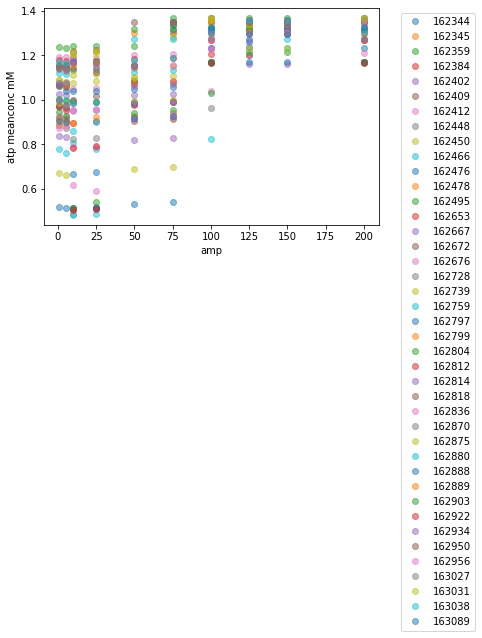

In [27]:
groups = atpFromIna.loc[atpFromIna['etype']=='bAC',:].groupby('gid')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group['amp'], group['atp_meanconc_1'].abs(), marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_xlabel('amp')
ax.set_ylabel('atp meanconc mM') 

plt.show()


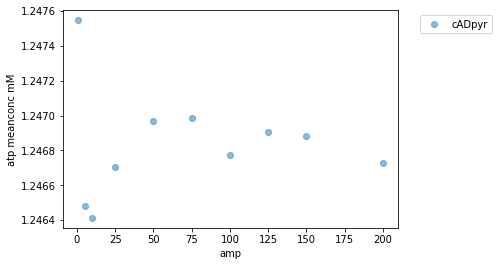

In [19]:
groups = atpFromIna.loc[atpFromIna['gid']==147761,:].groupby('etype')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group['amp'], group['atp_meanconc_1'].abs(), marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


ax.set_xlabel('amp')
ax.set_ylabel('atp meanconc mM') 

plt.show()


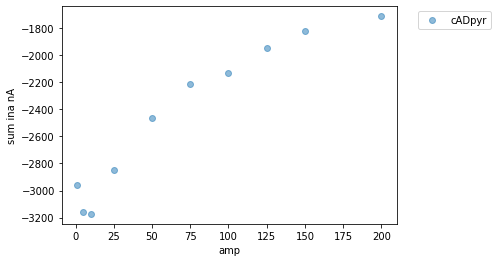

In [20]:
groups = atpFromIna.loc[atpFromIna['gid']==147761,:].groupby('etype')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group['amp'], group['inaSum_1'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


ax.set_xlabel('amp')
ax.set_ylabel('sum ina nA') 

plt.show()


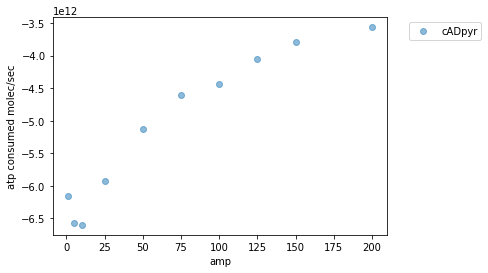

In [21]:
# atp consumed. based on ina

groups = atpFromIna.loc[atpFromIna['gid']==147761,:].groupby('etype')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group['amp'], group['atp_1'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


ax.set_xlabel('amp')
ax.set_ylabel('atp consumed molec/sec') 

plt.show()


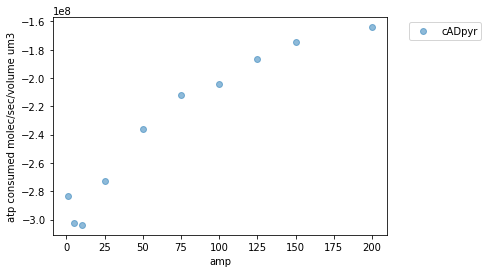

In [22]:
# atp consumed. based on ina

groups = atpFromIna.loc[atpFromIna['gid']==147761,:].groupby('etype')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group['amp'], group['atpPerVol_1'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


ax.set_xlabel('amp')
ax.set_ylabel('atp consumed molec/sec/volume um3') 

plt.show()


In [28]:
efeldf = pd.DataFrame()

for i in range(10):
    feature_values_file_name1 = "/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/diff_pulses/amp" + str(i+1) + "/efel_amp" + str(i+1) + "_f1.pickle"
    feature_values_file_name2 = "/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/diff_pulses/amp" + str(i+1) + "/efel_amp" + str(i+1) + "_f2.pickle"
    
    
    with open(feature_values_file_name1, 'rb') as handle:
        feature_values = pickle.load(handle)

    with open(feature_values_file_name2, 'rb') as handle:
        feature_values2 = pickle.load(handle)

    fr1 = pd.DataFrame(feature_values)
    fr2 = pd.DataFrame(feature_values2)

    fr = pd.concat([fr1,fr2])
    frt = fr.transpose()
    frt = frt.reset_index()
    frt = frt.rename(columns = {'index':'gid'})

    frt['gid']=frt['gid'].astype(int)
    frt = frt.dropna()

    if (i+1 == 1):
        frt['amp'] = 10
    elif (i+1 == 2):
        frt['amp'] = 100
    elif (i+1 == 3):
        frt['amp'] = 200
    elif (i+1 == 4):
        frt['amp'] = 50
    elif (i+1 == 5):
        frt['amp'] = 150
    elif (i+1 == 6):
        frt['amp'] = 75
    elif (i+1 == 7):
        frt['amp'] = 125
    elif (i+1 == 8):
        frt['amp'] = 25
    elif (i+1 == 9):
        frt['amp'] = 5
    elif (i+1 == 10):
        frt['amp'] = 1
    else:
        print("check i")
        
    efeldf = efeldf.append(frt,ignore_index=True)
    
efeldf = efeldf.reset_index(drop=True)

In [50]:
efeldf.head()

gid  AP_amplitude  AP_height  AP_duration  AP_duration_half_width  \
0  147760     83.203913  32.214543     2.553846                1.215385   
1  147761     74.211186  26.561690     2.357143                1.121429   
2  147792     82.678591  33.800964     3.214286                1.278571   
3  147794    101.444820  49.824747     2.735714                0.928571   
4  147796     74.150344  26.313292     2.820000                1.246667   

   mean_frequency  AHP_depth  AHP_time_from_peak  voltage_base  \
0       13.215411   1.376170           33.069231    -65.104286   
1       14.226197   1.043616           17.235714    -65.119095   
2       14.152851  -8.792892           15.923077    -65.089149   
3       15.032750   9.715259            7.885714    -65.099838   
4       15.459136   0.504257           18.913333    -65.104012   

   time_to_first_spike  ...  AHP_depth_abs  Spikecount  amp_drop_first_last  \
0                 22.0  ...     -63.728116        13.0            12.294582   
1                 22.1  ...     -64.075479        14.0             6.805674   
2                 23.2  ...     -73.882042        14.0             3.790535   
3                 20.5  ...     -55.384579        14.0             2.686947   
4                 22.3  ...     -64.599755        15.0            11.277887   

   irregularity_index  max_amp_difference  maximum_voltage  mean_AP_amplitude  \
0           21.136364           23.763487        41.081383          83.203913   
1           28.316667           52.356141        39.682289          74.211186   
2           16.458333            9.931698        40.836010          82.678591   
3           17.066667           12.529099        59.391426         101.444820   
4           18.700000           28.039587        35.950867          74.150344   

   peak_voltage  spike_half_width  amp  
0     32.214543         32.965549   10  
1     26.561690          5.853711   10  
2     33.800964          1.679073   10  
3     49.824747          0.782703   10  
4     26.313292          6.805363   10  

[5 rows x 29 columns]

In [29]:
df = pd.merge(atpFromIna,efeldf,on=['gid','amp'],how='inner')

In [52]:
len(efeldf)

18795

In [53]:
len(atpFromIna)

21310

In [54]:
len(df)

18785

In [55]:
df.head()

gid  cells_volumes_um3   cells_areas         atp_1     inaSum_1  \
0  147761       21720.364520  59517.611050 -6.598545e+12 -3172.727159   
1  147792       27171.072777  51461.060262 -2.131337e+12 -1024.794304   
2  147794        7496.108039  21471.106164 -1.466280e+12  -705.020021   
3  147796       23186.915375  55994.339792 -7.641386e+12 -3674.148476   
4  147811       17374.020435  30299.598958 -3.038692e+12 -1461.070703   

          atp_2     inaSum_2           x            y           z  ...  \
0 -3.776118e+12 -1815.641421  517.843059   727.718341  541.055042  ...   
1 -2.245086e+12 -1079.487495  490.670078   928.125356  619.340420  ...   
2 -1.569652e+12  -754.723475  315.838227  1037.090485  769.339527  ...   
3 -6.010440e+12 -2889.953393  471.725456   852.072421  612.918273  ...   
4 -3.590133e+12 -1726.216004  191.473742  1158.092730  466.776528  ...   

  inv_last_ISI  AHP_depth_abs Spikecount amp_drop_first_last  \
0    12.254902     -64.075479       14.0            6.805674   
1    12.903226     -73.882042       14.0            3.790535   
2    15.649452     -55.384579       14.0            2.686947   
3    22.321429     -64.599755       15.0           11.277887   
4    14.513788     -55.753272       13.0            2.705894   

  irregularity_index  max_amp_difference  maximum_voltage  mean_AP_amplitude  \
0          28.316667           52.356141        39.682289          74.211186   
1          16.458333            9.931698        40.836010          82.678591   
2          17.066667           12.529099        59.391426         101.444820   
3          18.700000           28.039587        35.950867          74.150344   
4          14.936364            9.829697        53.526611          96.156746   

   peak_voltage  spike_half_width  
0     26.561690          5.853711  
1     33.800964          1.679073  
2     49.824747          0.782703  
3     26.313292          6.805363  
4     47.132430          0.873085  

[5 rows x 47 columns]

In [30]:
atp_rate = pd.DataFrame()

for i in range(10):
    atp_ratefile = "/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/diff_pulses/amp" + str(i+1) + "/atpRate.tsv" # in case of ina_500
    
    atp_rateSub = pd.read_csv(atp_ratefile,sep='\t',index_col=0)
    
    if (i+1 == 1):
        atp_rateSub['amp'] = 10
    elif (i+1 == 2):
        atp_rateSub['amp'] = 100
    elif (i+1 == 3):
        atp_rateSub['amp'] = 200
    elif (i+1 == 4):
        atp_rateSub['amp'] = 50
    elif (i+1 == 5):
        atp_rateSub['amp'] = 150
    elif (i+1 == 6):
        atp_rateSub['amp'] = 75
    elif (i+1 == 7):
        atp_rateSub['amp'] = 125
    elif (i+1 == 8):
        atp_rateSub['amp'] = 25
    elif (i+1 == 9):
        atp_rateSub['amp'] = 5
    elif (i+1 == 10):
        atp_rateSub['amp'] = 1
    else:
        print("check i")
        
    atp_rate = atp_rate.append(atp_rateSub,ignore_index=True)
    
atp_rate = atp_rate.reset_index(drop=True)

In [31]:
df_rate = pd.merge(df,atp_rate,on=['gid','amp'],how='inner')

In [32]:
df = df_rate.copy()

In [33]:
df.columns

Index(['gid', 'cells_volumes_um3', 'cells_areas', 'atp_1', 'inaSum_1', 'atp_2',
       'inaSum_2', 'x_x', 'y_x', 'z_x', 'synapse_class_x', 'layer_x',
       'etype_x', 'mtype_x', 'etype_mtype_x', 'atp_meanconc_1',
       'atp_meanconc_2', 'amp', 'atpPerVol_1', 'atpPerVol_2', 'AP_amplitude',
       'AP_height', 'AP_duration', 'AP_duration_half_width', 'mean_frequency',
       'AHP_depth', 'AHP_time_from_peak', 'voltage_base',
       'time_to_first_spike', 'time_to_last_spike', 'ISI_CV', 'ISI_log_slope',
       'inv_first_ISI', 'inv_second_ISI', 'inv_third_ISI', 'inv_fourth_ISI',
       'inv_fifth_ISI', 'inv_last_ISI', 'AHP_depth_abs', 'Spikecount',
       'amp_drop_first_last', 'irregularity_index', 'max_amp_difference',
       'maximum_voltage', 'mean_AP_amplitude', 'peak_voltage',
       'spike_half_width', 'atp_rate', 'x_y', 'y_y', 'z_y', 'synapse_class_y',
       'layer_y', 'etype_y', 'mtype_y', 'etype_mtype_y'],
      dtype='object')

In [36]:
df.loc[df['etype_x']=='cADpyr','mtype_x'].unique()

array(['L5_TPC:A'], dtype=object)

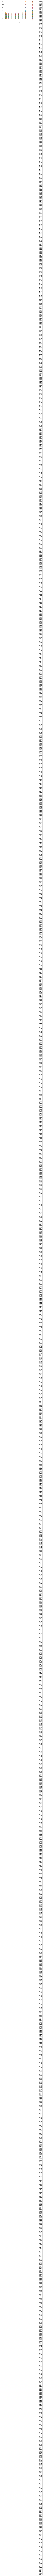

In [111]:
groups = df.loc[df['etype']=='cADpyr',:].groupby('gid')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group['amp'], group['mean_frequency'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_xlabel('amp')
ax.set_ylabel('mean frequency Hz') 

plt.show()


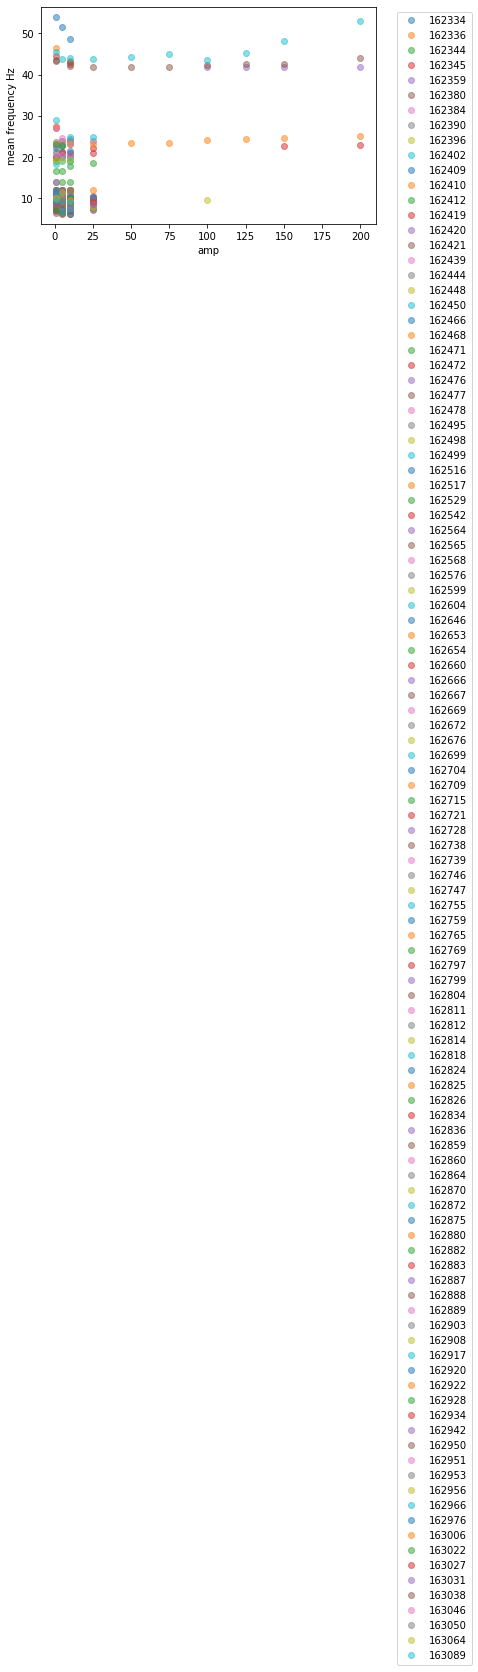

In [112]:
groups = df.loc[df['mtype']=='L5_MC',:].groupby('gid')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group['amp'], group['mean_frequency'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_xlabel('amp')
ax.set_ylabel('mean frequency Hz') 

plt.show()


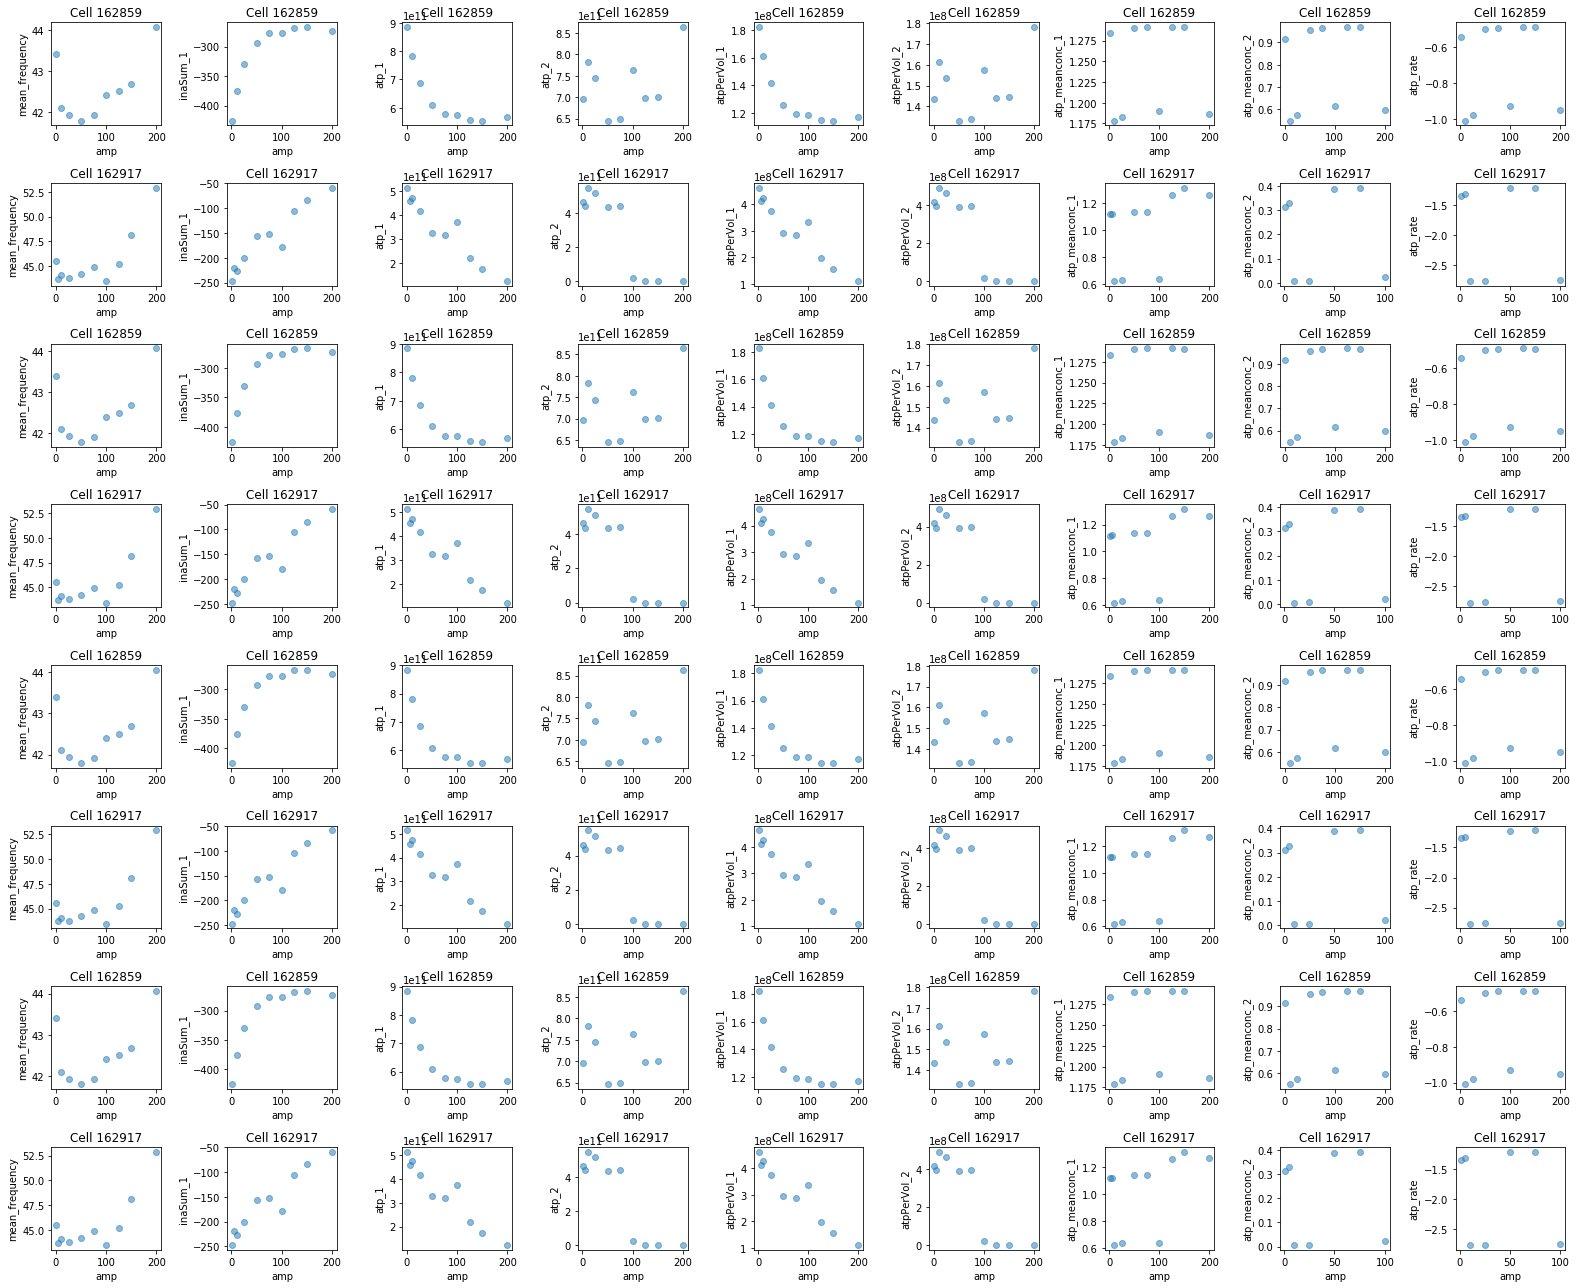

In [37]:
fig, axs = plt.subplots(8,9,figsize=(22,18))

for i,c in enumerate(['mean_frequency','inaSum_1','atp_1','atp_2','atpPerVol_1','atpPerVol_2','atp_meanconc_1','atp_meanconc_2','atp_rate']):
        
    x = i % 9
     
    for j,gids in enumerate(df.loc[df['etype_x']=='cSTUT','gid'][4:12]):
        
        y = j % 8
        
        axs[y, x].plot(df.loc[df['gid']==gids,'amp'],df.loc[df['gid']==gids,c], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
        axs[y, x].set_title(f'Cell {gids}')
        axs[y, x].set(xlabel='amp', ylabel=c)

fig.tight_layout()

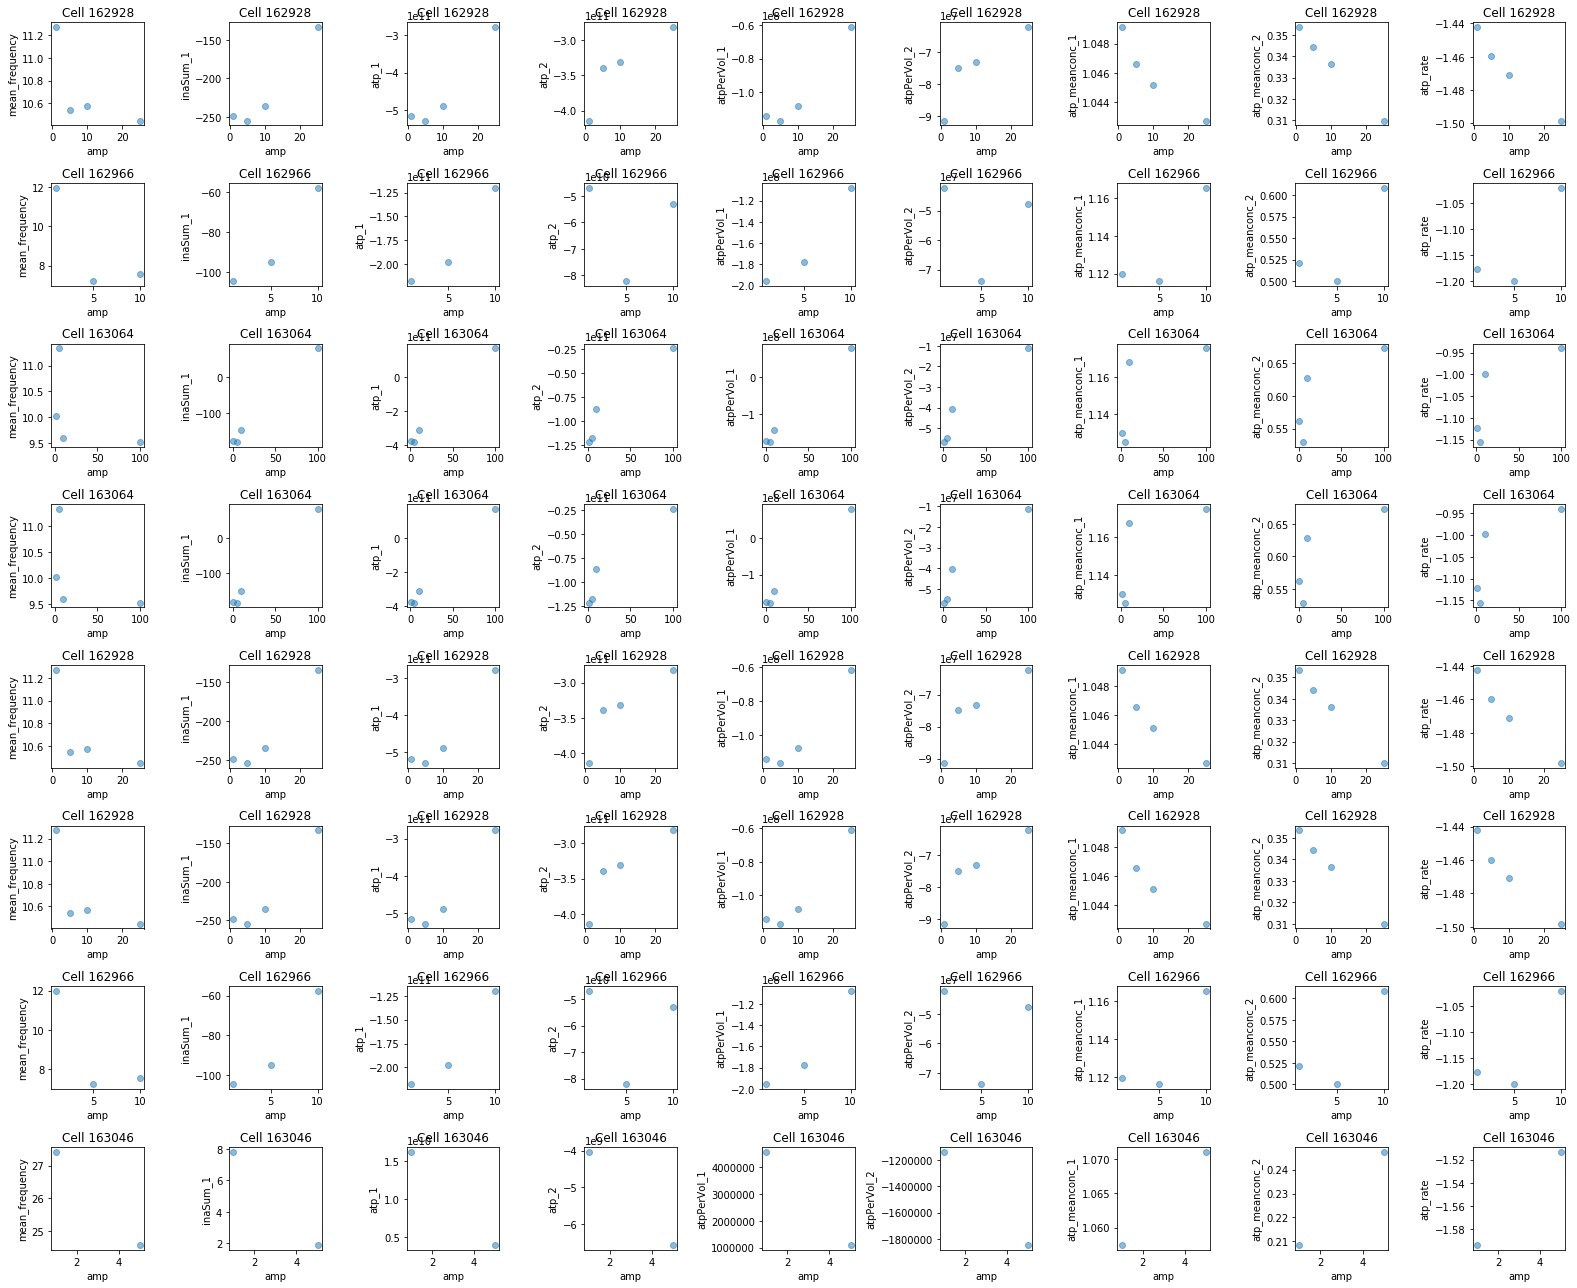

In [120]:
fig, axs = plt.subplots(8,9,figsize=(22,18))

for i,c in enumerate(['mean_frequency','inaSum_1','atp_1','atp_2','atpPerVol_1','atpPerVol_2','atp_meanconc_1','atp_meanconc_2','atp_rate']):
        
    x = i % 9
     
    for j,gids in enumerate(df.loc[df['etype_x']=='cNAC','gid'][0:8]):
        
        y = j % 8
        
        axs[y, x].plot(df.loc[df['gid']==gids,'amp'],df.loc[df['gid']==gids,c], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
        axs[y, x].set_title(f'Cell {gids}')
        axs[y, x].set(xlabel='amp', ylabel=c)

fig.tight_layout()

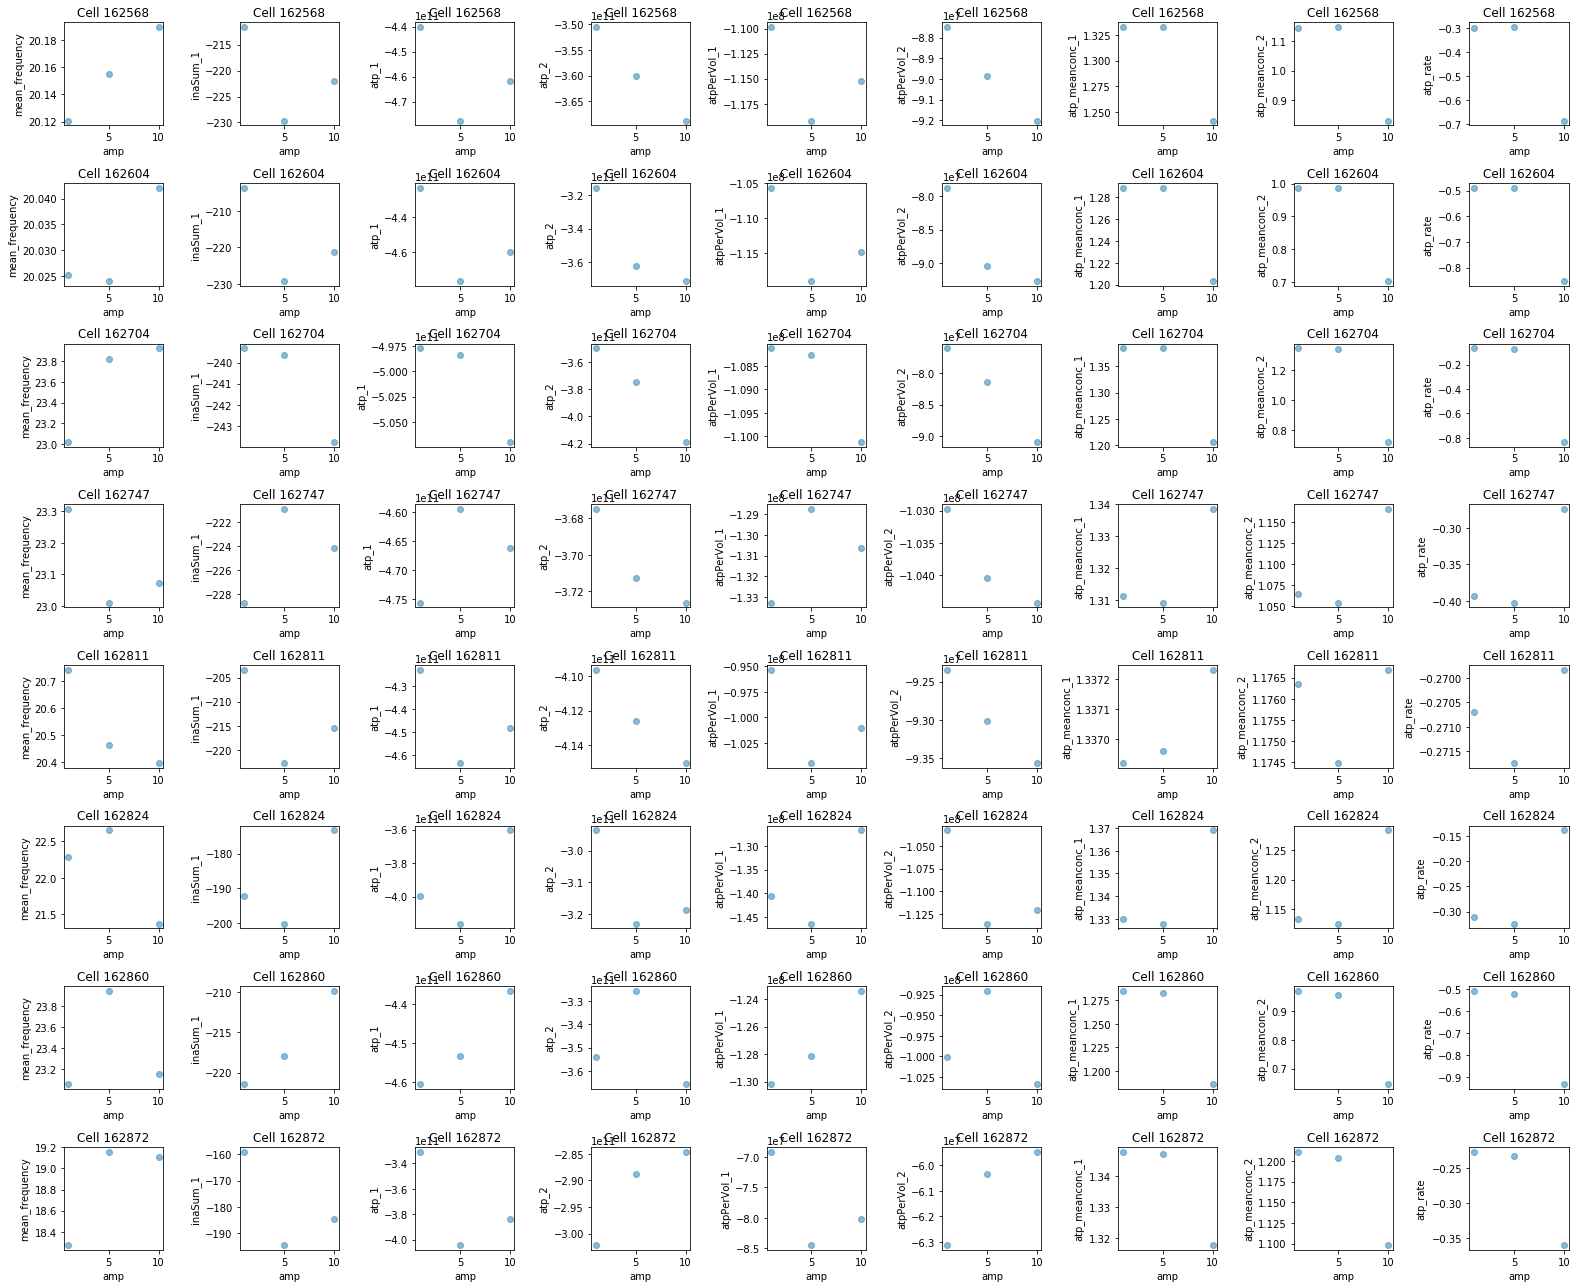

In [121]:
fig, axs = plt.subplots(8,9,figsize=(22,18))

for i,c in enumerate(['mean_frequency','inaSum_1','atp_1','atp_2','atpPerVol_1','atpPerVol_2','atp_meanconc_1','atp_meanconc_2','atp_rate']):
        
    x = i % 9
     
    for j,gids in enumerate(df.loc[df['etype_x']=='bIR','gid'][0:8]):
        
        y = j % 8
        
        axs[y, x].plot(df.loc[df['gid']==gids,'amp'],df.loc[df['gid']==gids,c], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
        axs[y, x].set_title(f'Cell {gids}')
        axs[y, x].set(xlabel='amp', ylabel=c)

fig.tight_layout()

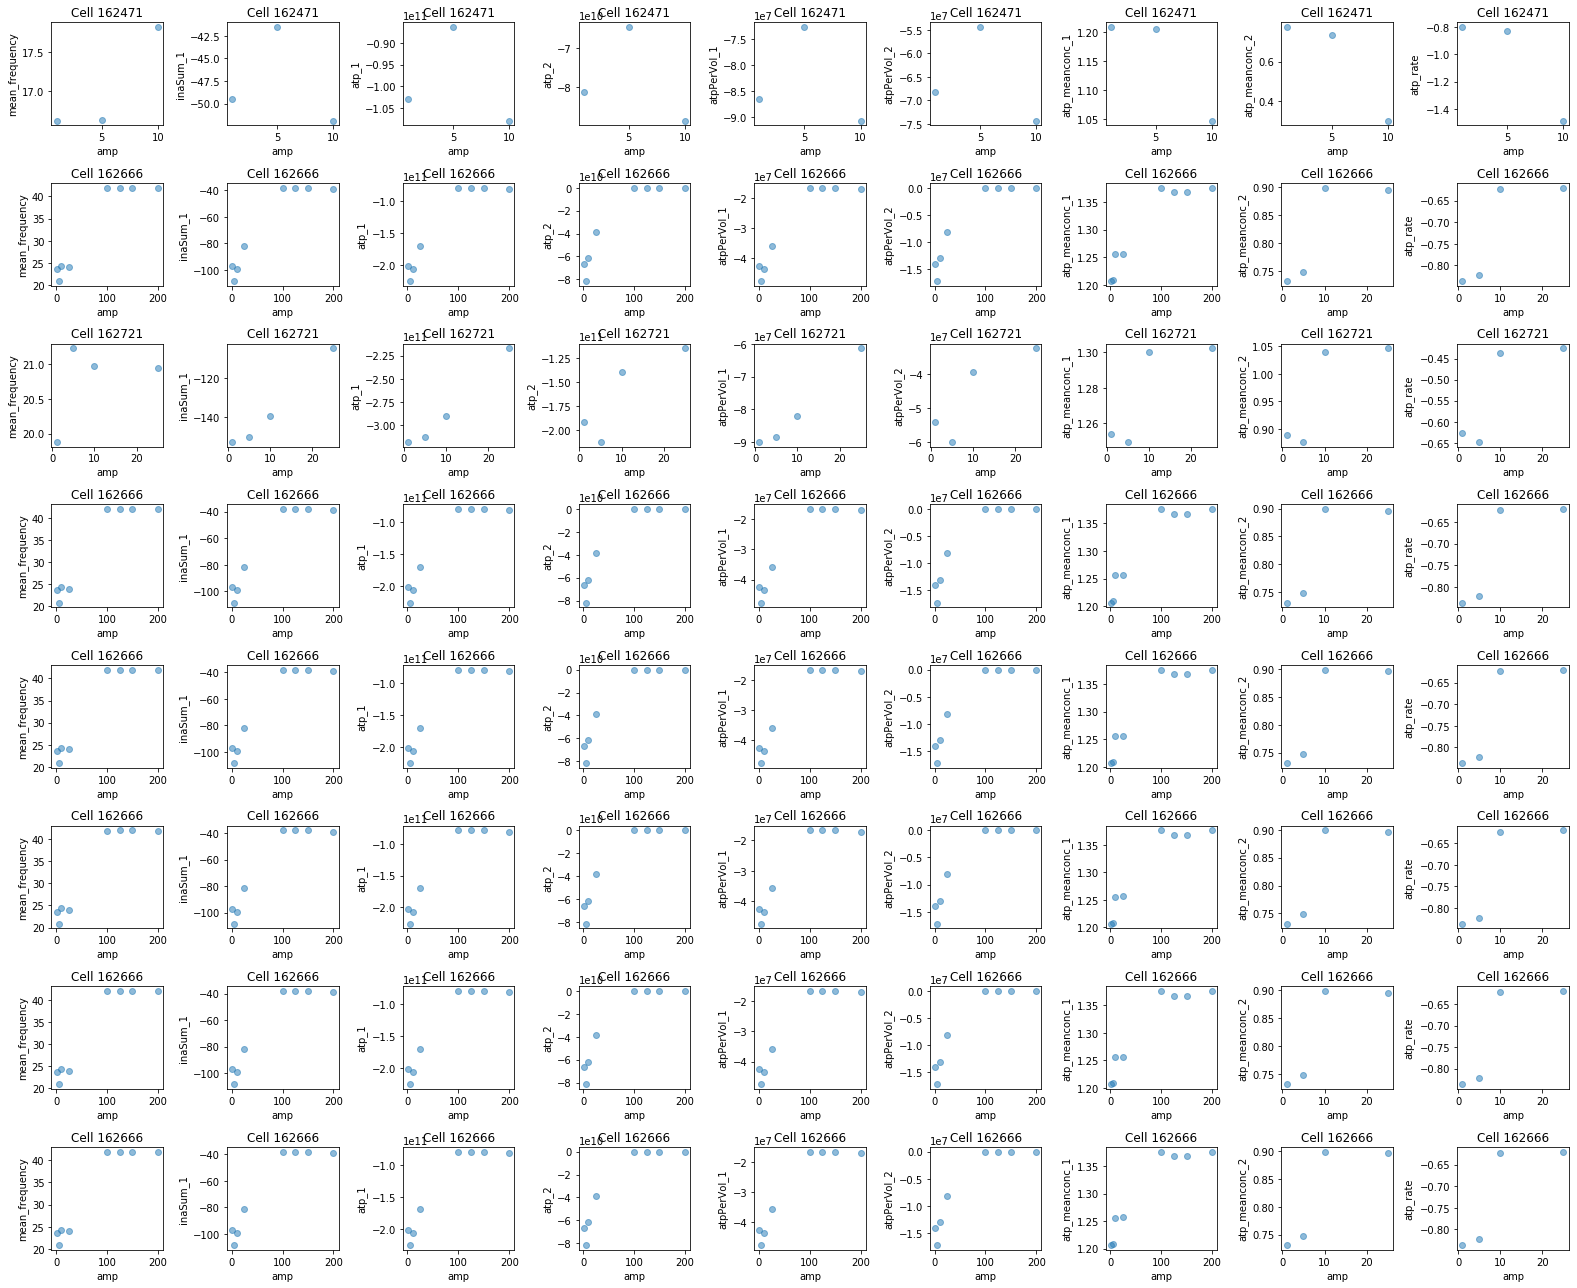

In [122]:
fig, axs = plt.subplots(8,9,figsize=(22,18))

for i,c in enumerate(['mean_frequency','inaSum_1','atp_1','atp_2','atpPerVol_1','atpPerVol_2','atp_meanconc_1','atp_meanconc_2','atp_rate']):
        
    x = i % 9
     
    for j,gids in enumerate(df.loc[df['etype_x']=='dNAC','gid'][0:8]):
        
        y = j % 8
        
        axs[y, x].plot(df.loc[df['gid']==gids,'amp'],df.loc[df['gid']==gids,c], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
        axs[y, x].set_title(f'Cell {gids}')
        axs[y, x].set(xlabel='amp', ylabel=c)

fig.tight_layout()

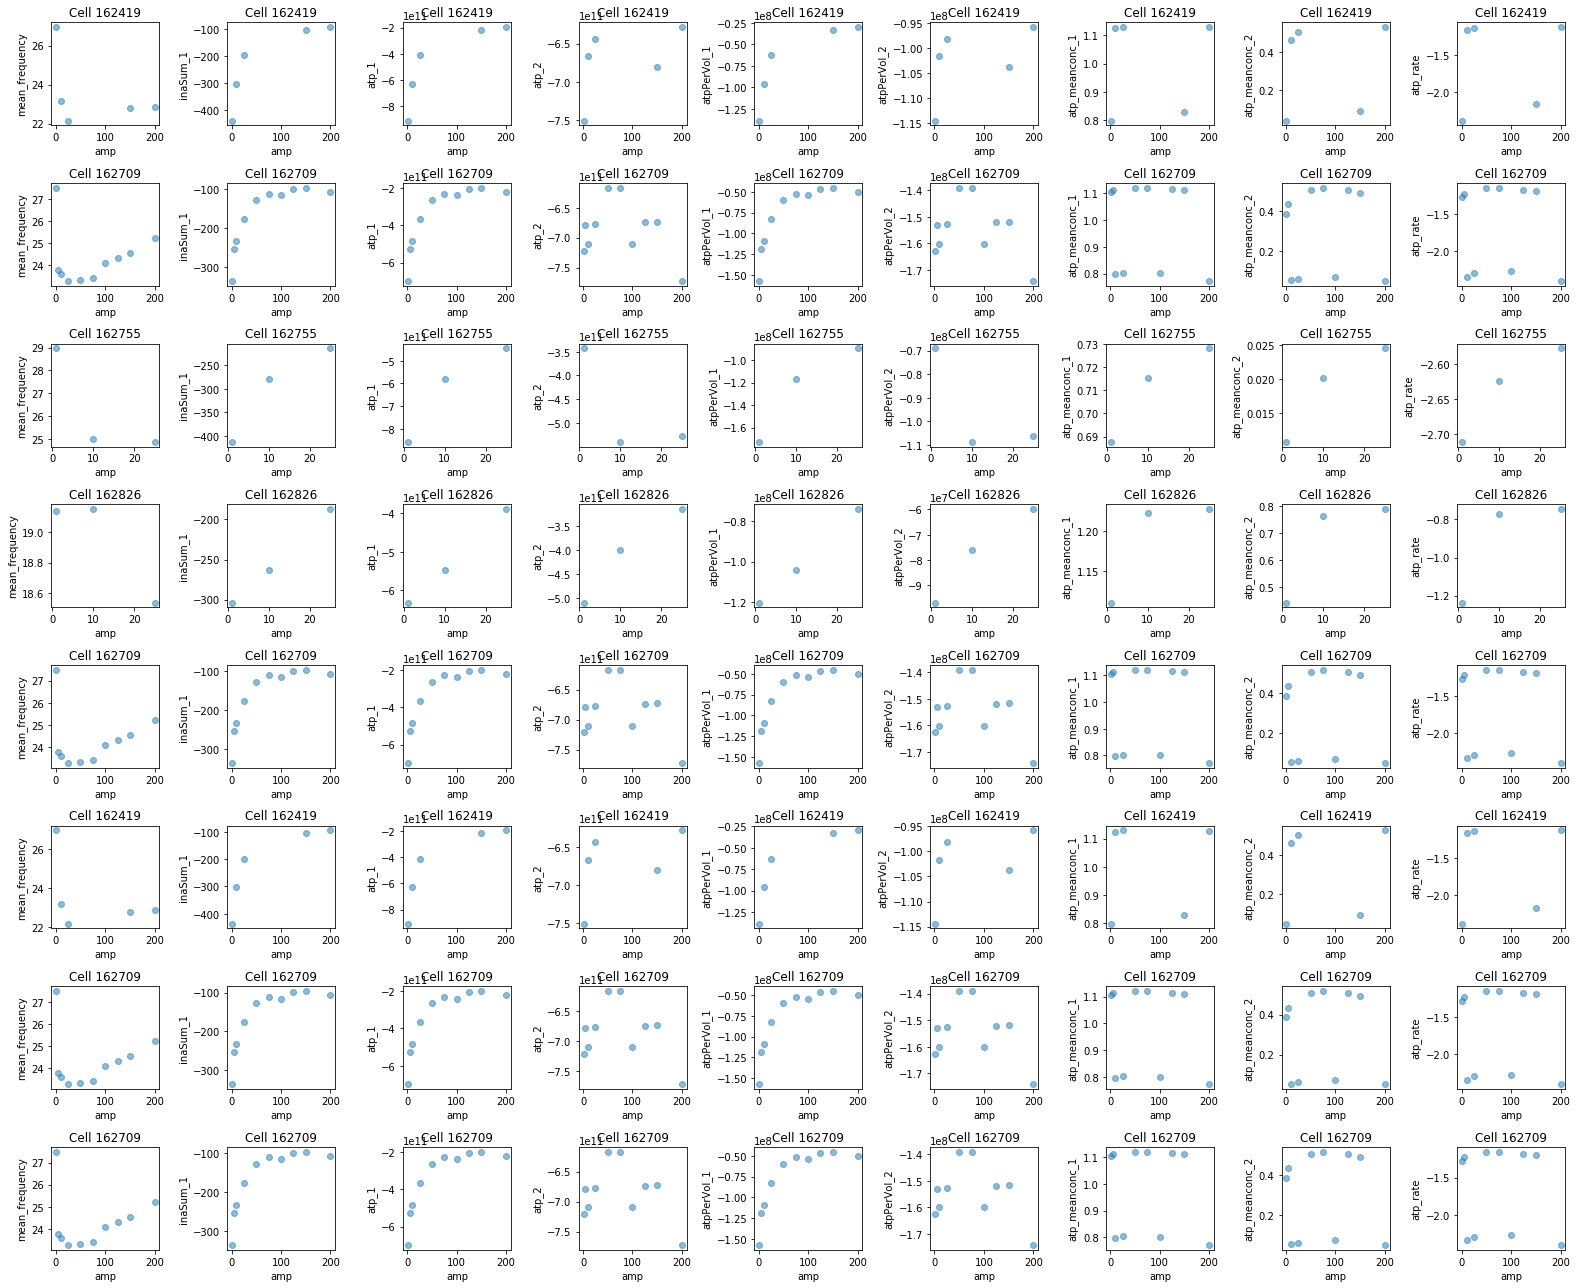

In [123]:
fig, axs = plt.subplots(8,9,figsize=(22,18))

for i,c in enumerate(['mean_frequency','inaSum_1','atp_1','atp_2','atpPerVol_1','atpPerVol_2','atp_meanconc_1','atp_meanconc_2','atp_rate']):
        
    x = i % 9
     
    for j,gids in enumerate(df.loc[df['etype_x']=='bSTUT','gid'][0:8]):
        
        y = j % 8
        
        axs[y, x].plot(df.loc[df['gid']==gids,'amp'],df.loc[df['gid']==gids,c], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
        axs[y, x].set_title(f'Cell {gids}')
        axs[y, x].set(xlabel='amp', ylabel=c)

fig.tight_layout()

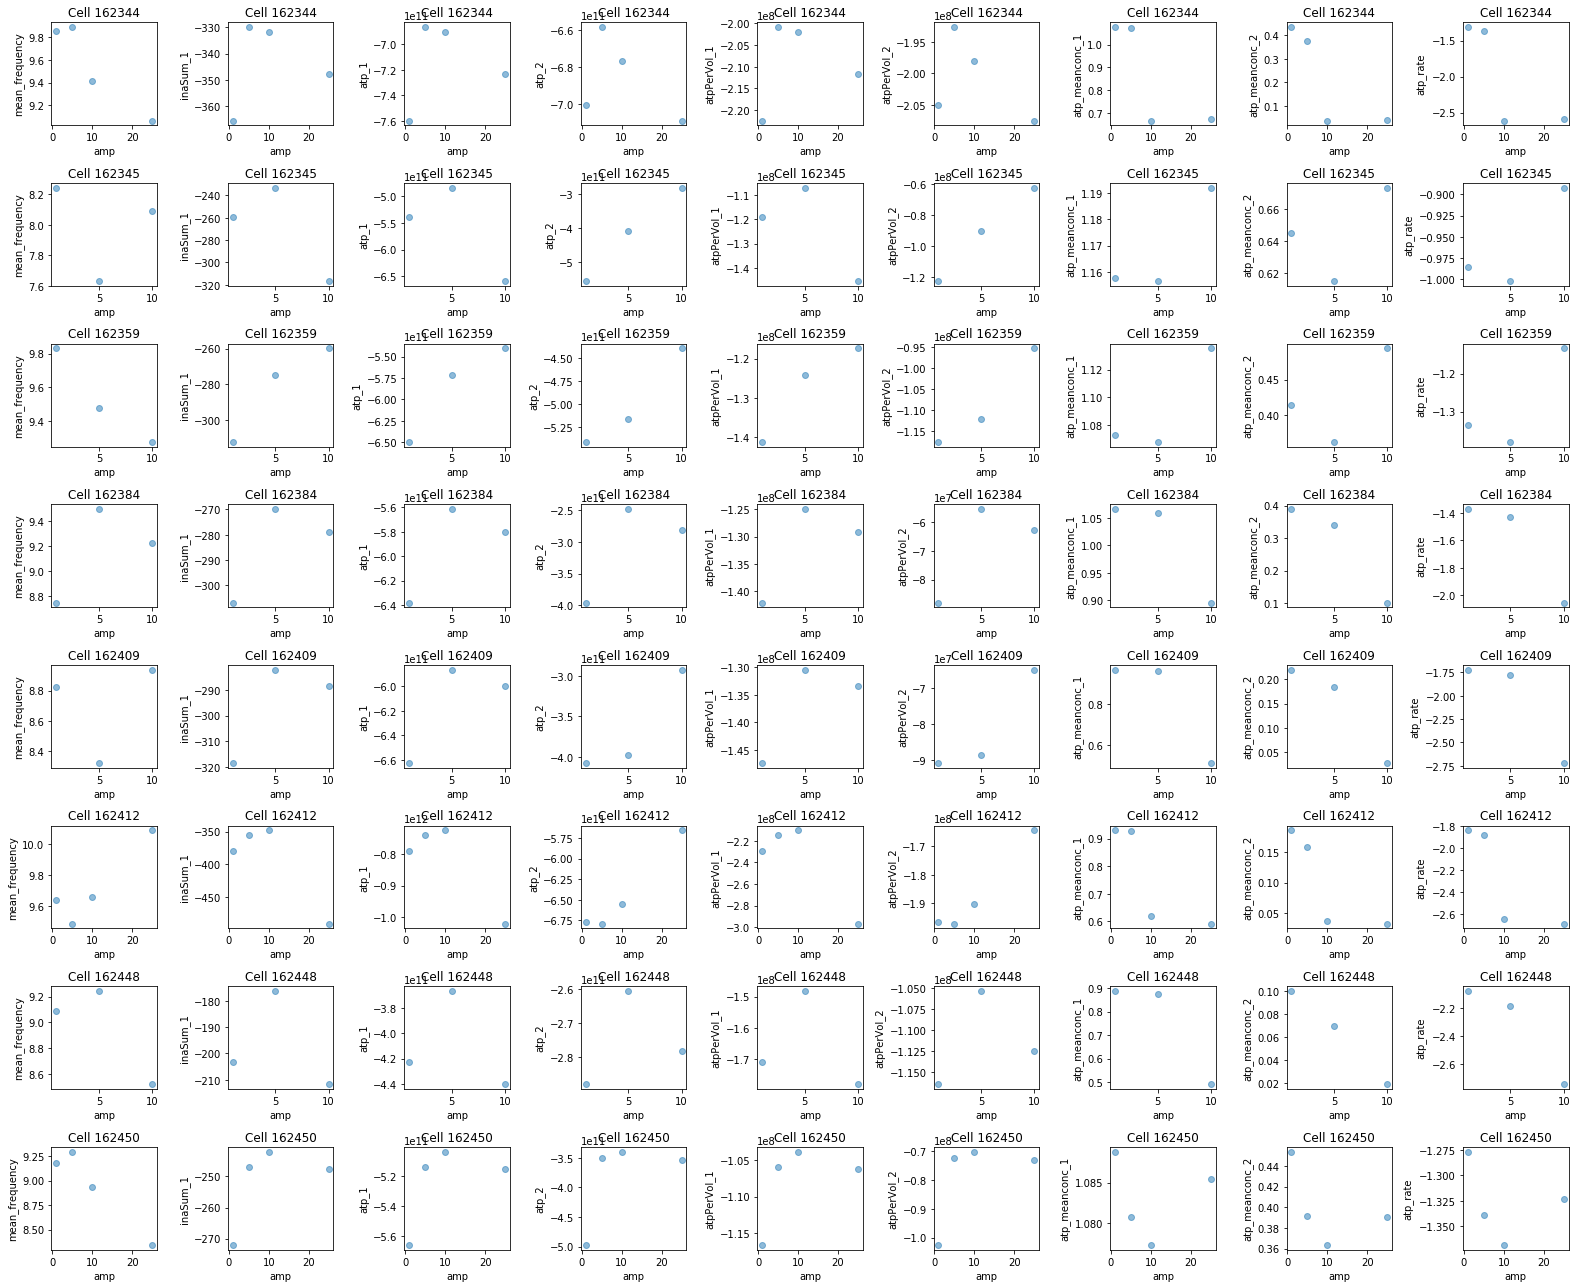

In [124]:
fig, axs = plt.subplots(8,9,figsize=(22,18))

for i,c in enumerate(['mean_frequency','inaSum_1','atp_1','atp_2','atpPerVol_1','atpPerVol_2','atp_meanconc_1','atp_meanconc_2','atp_rate']):
        
    x = i % 9
     
    for j,gids in enumerate(df.loc[df['etype_x']=='bAC','gid'][0:8]):
        
        y = j % 8
        
        axs[y, x].plot(df.loc[df['gid']==gids,'amp'],df.loc[df['gid']==gids,c], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
        axs[y, x].set_title(f'Cell {gids}')
        axs[y, x].set(xlabel='amp', ylabel=c)

fig.tight_layout()

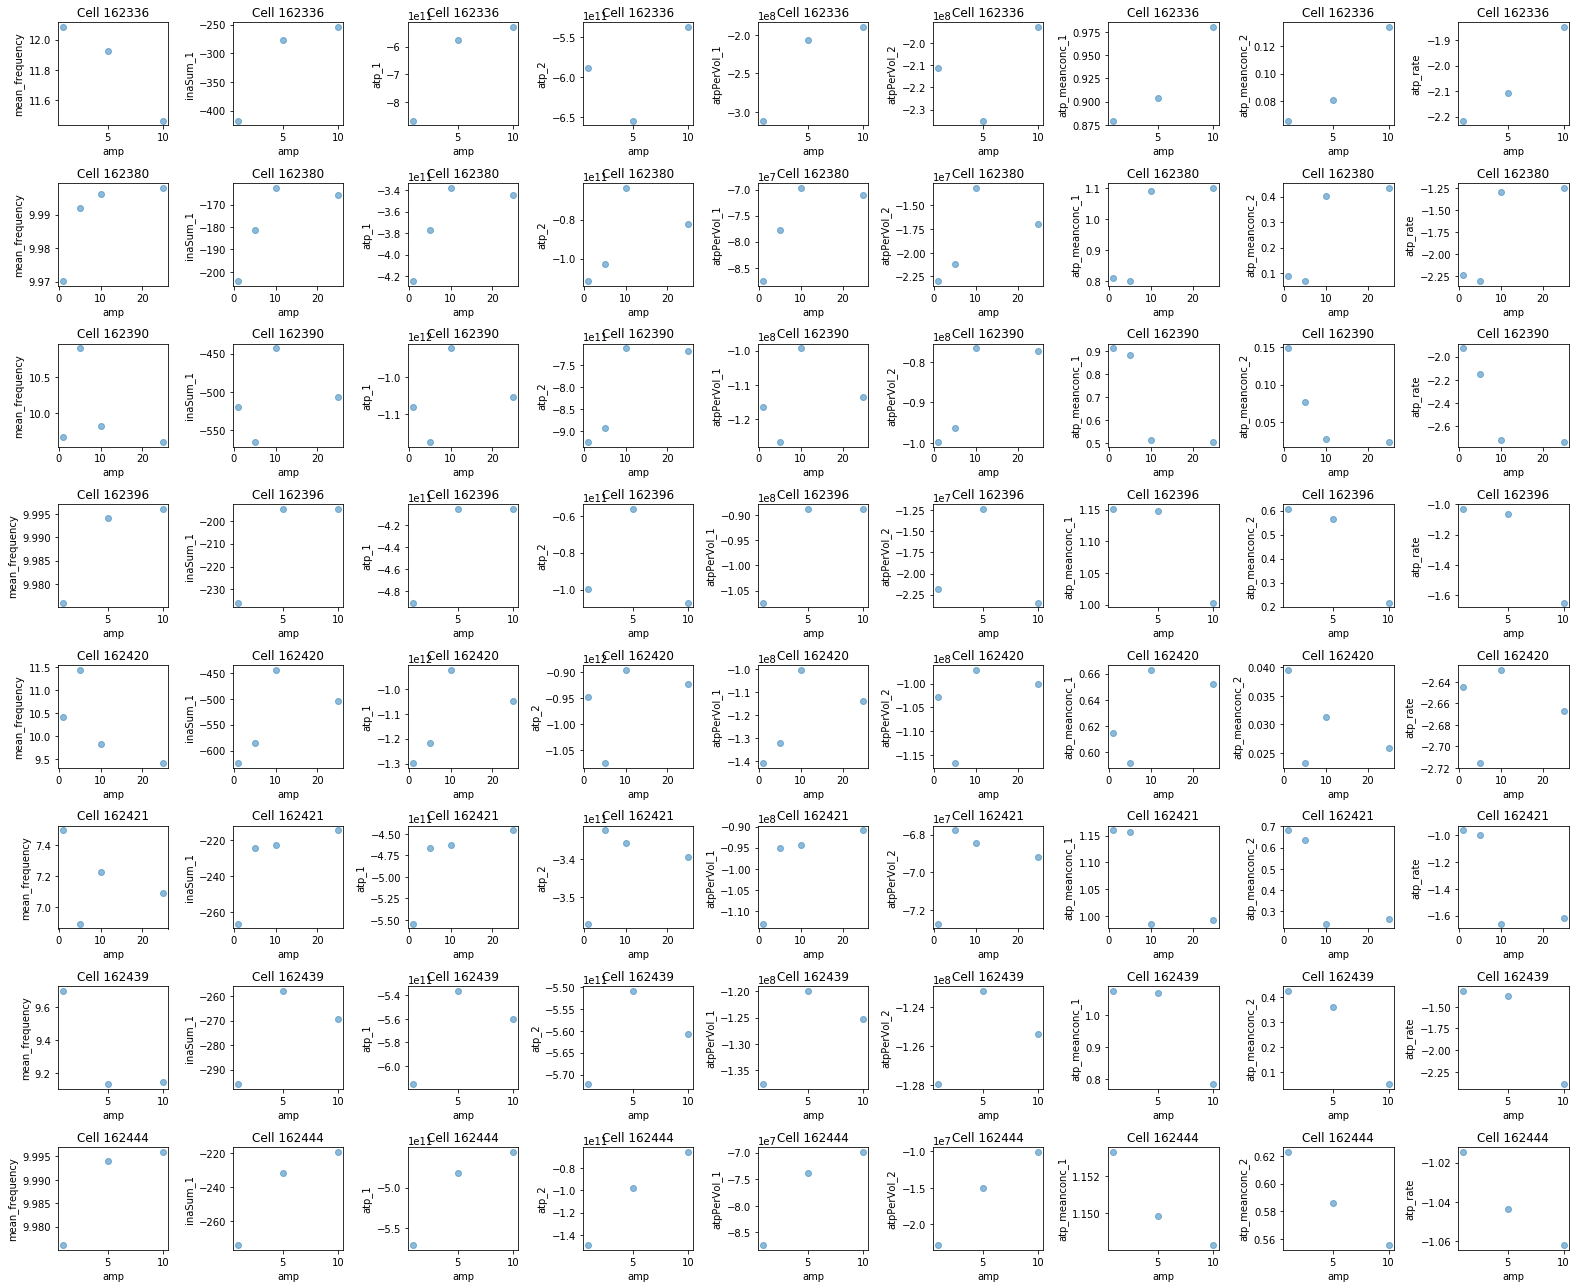

In [125]:
fig, axs = plt.subplots(8,9,figsize=(22,18))

for i,c in enumerate(['mean_frequency','inaSum_1','atp_1','atp_2','atpPerVol_1','atpPerVol_2','atp_meanconc_1','atp_meanconc_2','atp_rate']):
        
    x = i % 9
     
    for j,gids in enumerate(df.loc[df['etype_x']=='cACint','gid'][0:8]):
        
        y = j % 8
        
        axs[y, x].plot(df.loc[df['gid']==gids,'amp'],df.loc[df['gid']==gids,c], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
        axs[y, x].set_title(f'Cell {gids}')
        axs[y, x].set(xlabel='amp', ylabel=c)

fig.tight_layout()

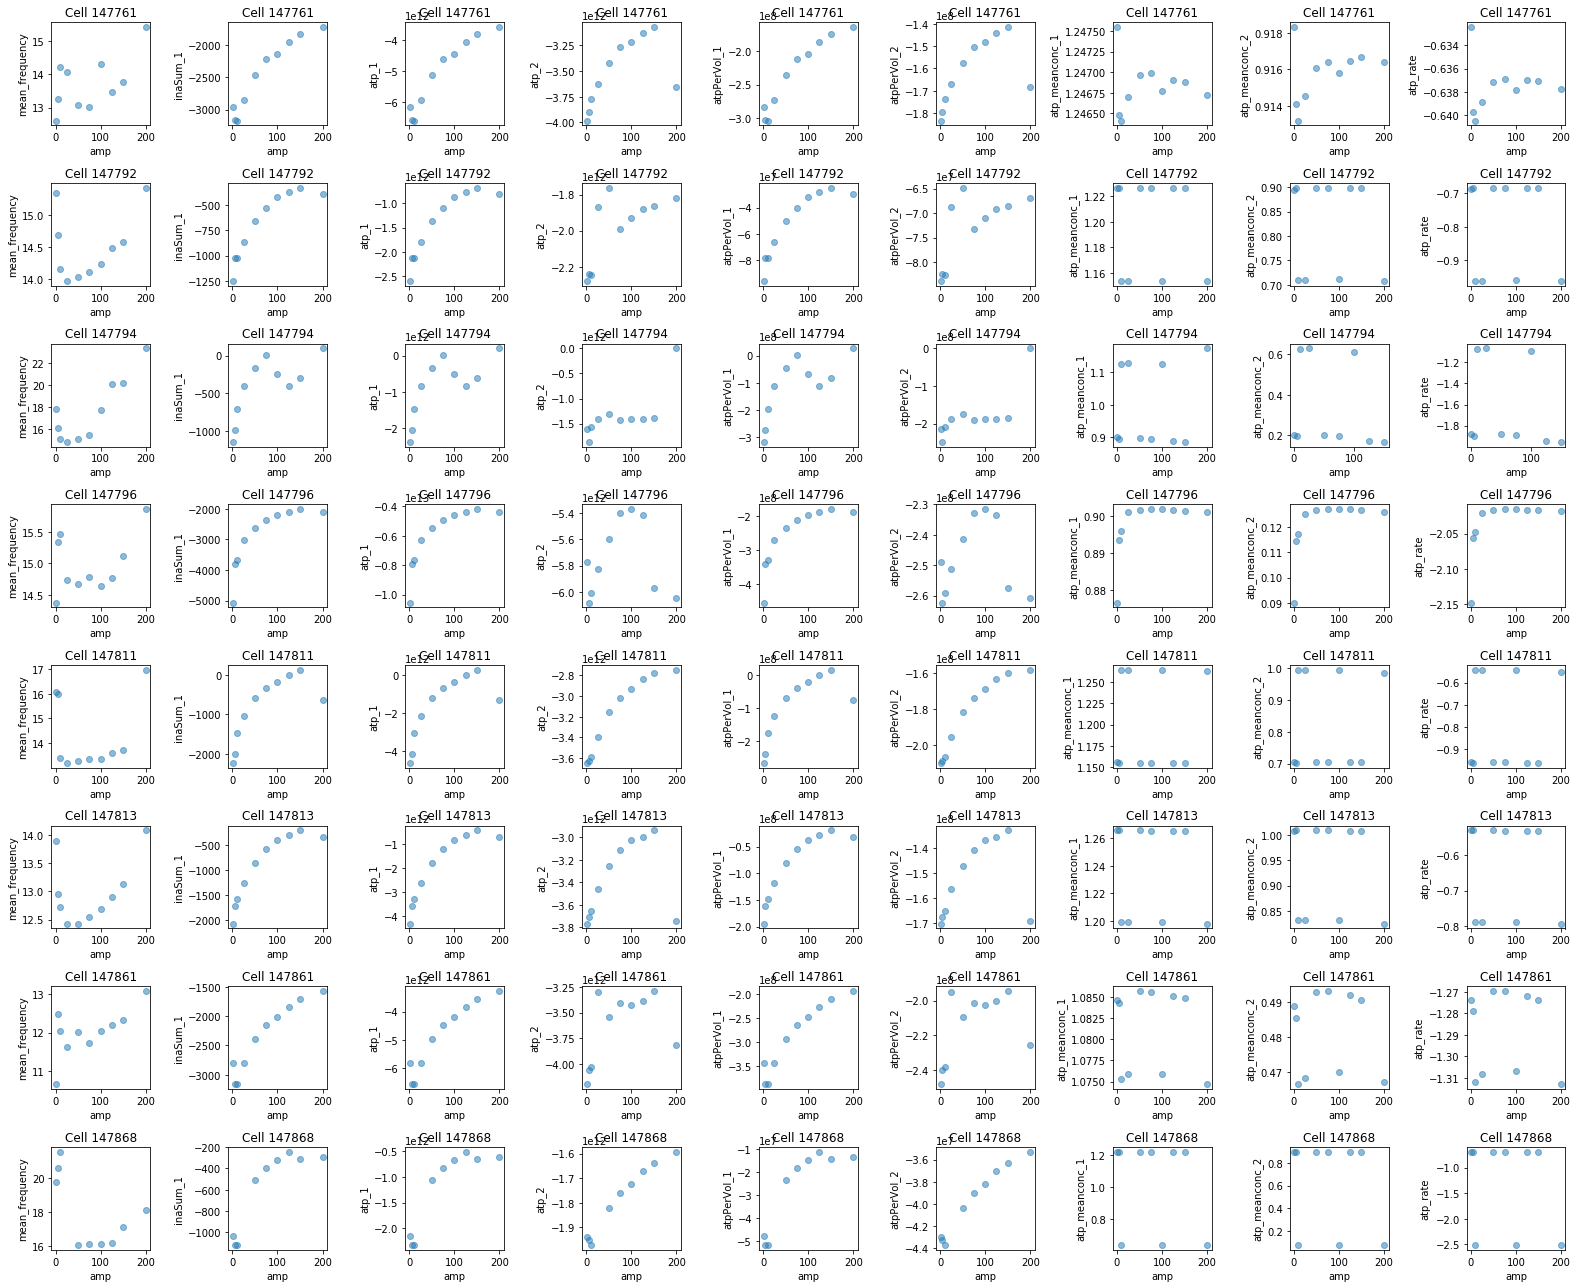

In [126]:
fig, axs = plt.subplots(8,9,figsize=(22,18))

for i,c in enumerate(['mean_frequency','inaSum_1','atp_1','atp_2','atpPerVol_1','atpPerVol_2','atp_meanconc_1','atp_meanconc_2','atp_rate']):
        
    x = i % 9
     
    for j,gids in enumerate(df.loc[df['etype_x']=='cADpyr','gid'][0:8]):
        
        y = j % 8
        
        axs[y, x].plot(df.loc[df['gid']==gids,'amp'],df.loc[df['gid']==gids,c], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
        axs[y, x].set_title(f'Cell {gids}')
        axs[y, x].set(xlabel='amp', ylabel=c)

fig.tight_layout()

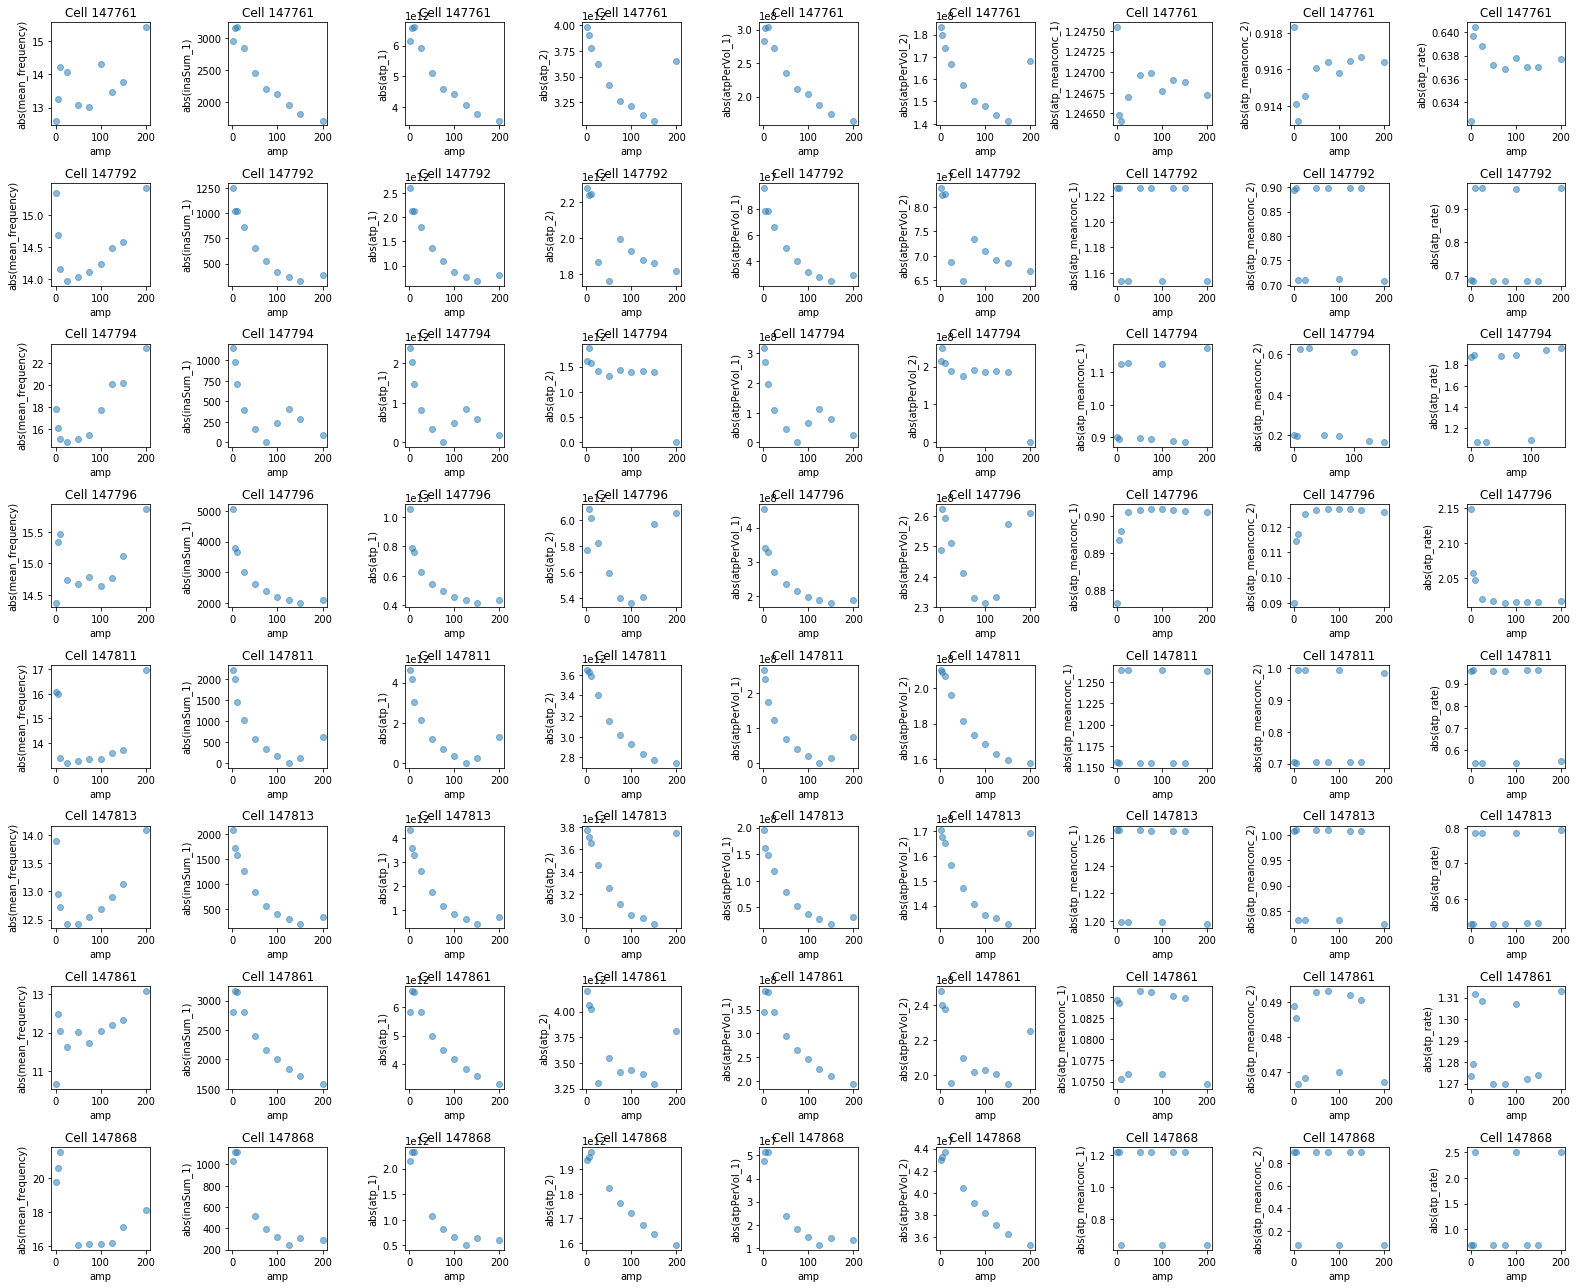

In [127]:
fig, axs = plt.subplots(8,9,figsize=(22,18))

for i,c in enumerate(['mean_frequency','inaSum_1','atp_1','atp_2','atpPerVol_1','atpPerVol_2','atp_meanconc_1','atp_meanconc_2','atp_rate']):
        
    x = i % 9
     
    for j,gids in enumerate(df.loc[df['etype_x']=='cADpyr','gid'][0:8]):
        
        y = j % 8
        
        axs[y, x].plot(df.loc[df['gid']==gids,'amp'],df.loc[df['gid']==gids,c].abs(), marker='.', linestyle='', ms=12, label=name, alpha=0.5)
        axs[y, x].set_title(f'Cell {gids}')
        axs[y, x].set(xlabel='amp', ylabel=f'abs({c})')

fig.tight_layout()

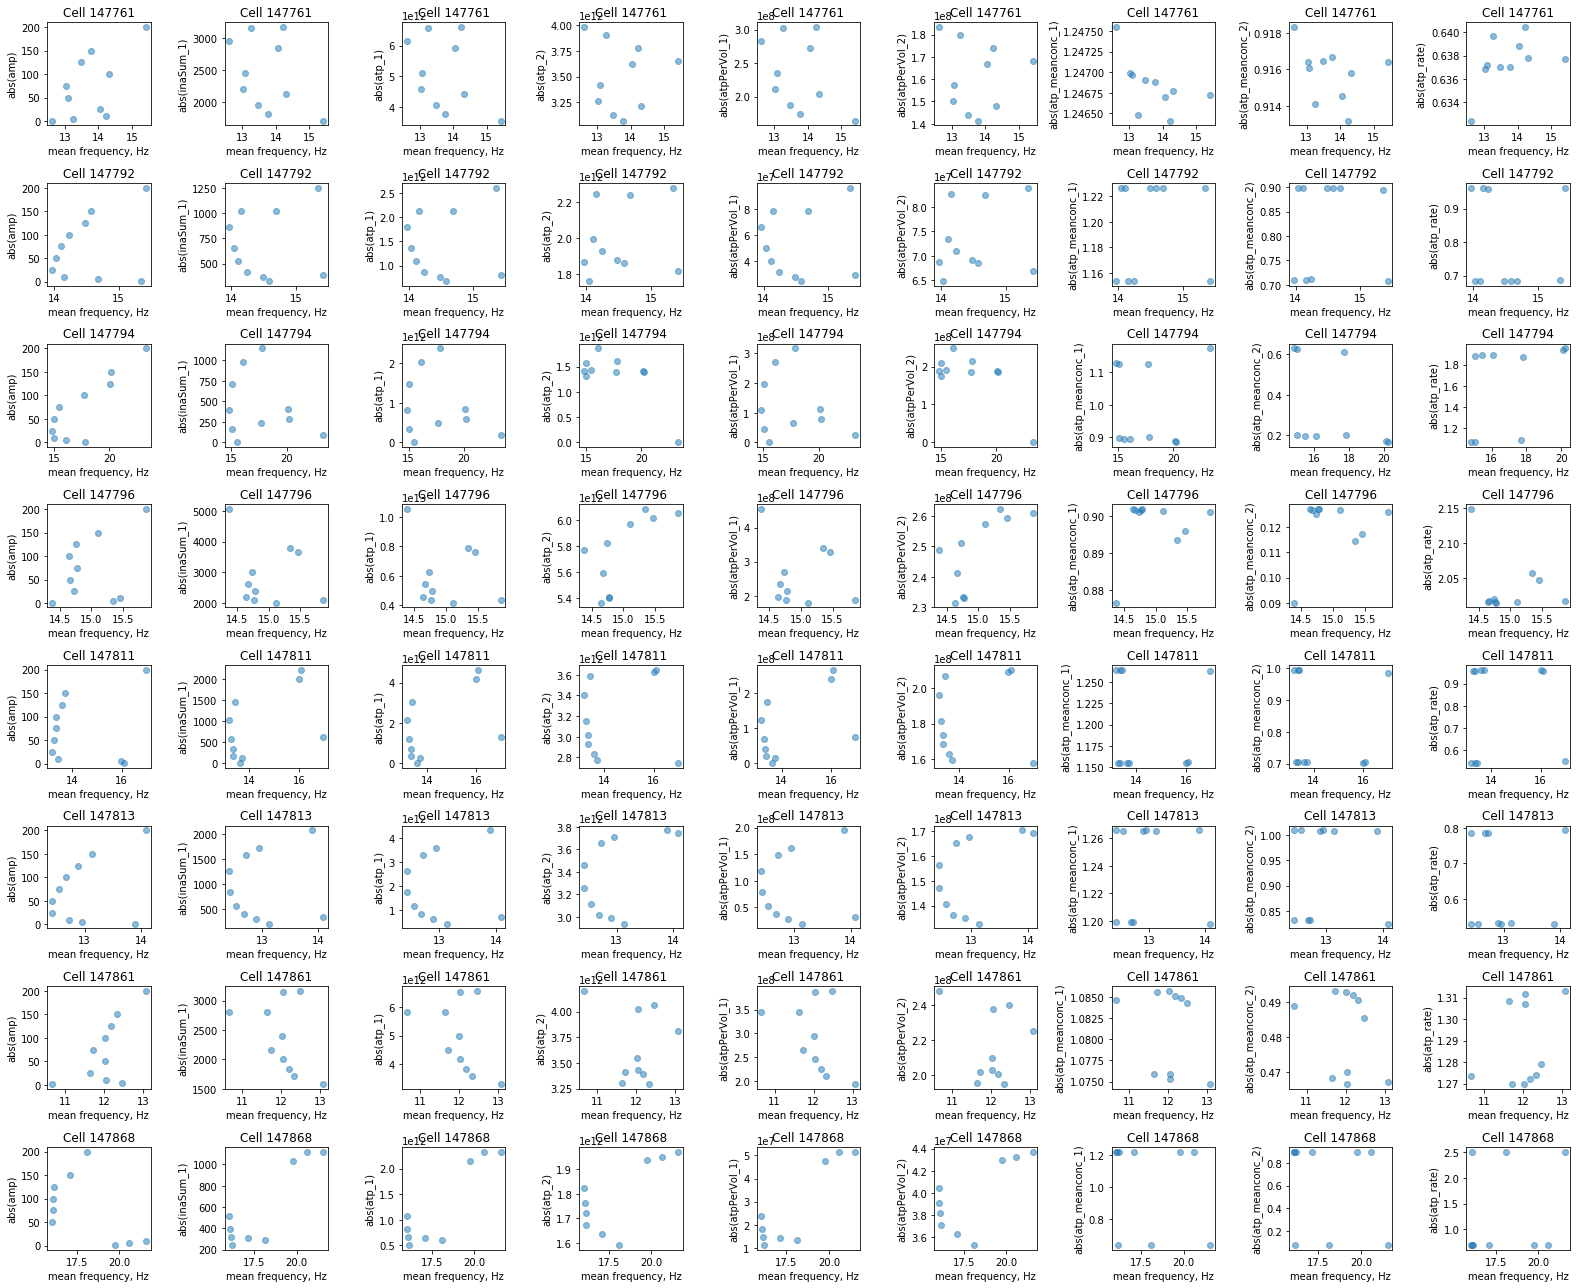

In [128]:
fig, axs = plt.subplots(8,9,figsize=(22,18))

for i,c in enumerate(['amp','inaSum_1','atp_1','atp_2','atpPerVol_1','atpPerVol_2','atp_meanconc_1','atp_meanconc_2','atp_rate']):
        
    x = i % 9
     
    for j,gids in enumerate(df.loc[df['etype_x']=='cADpyr','gid'][0:8]):
        
        y = j % 8
        
        axs[y, x].plot(df.loc[df['gid']==gids,'mean_frequency'],df.loc[df['gid']==gids,c].abs(), marker='.', linestyle='', ms=12, label=name, alpha=0.5)
        axs[y, x].set_title(f'Cell {gids}')
        axs[y, x].set(xlabel='mean frequency, Hz', ylabel=f'abs({c})')

fig.tight_layout()

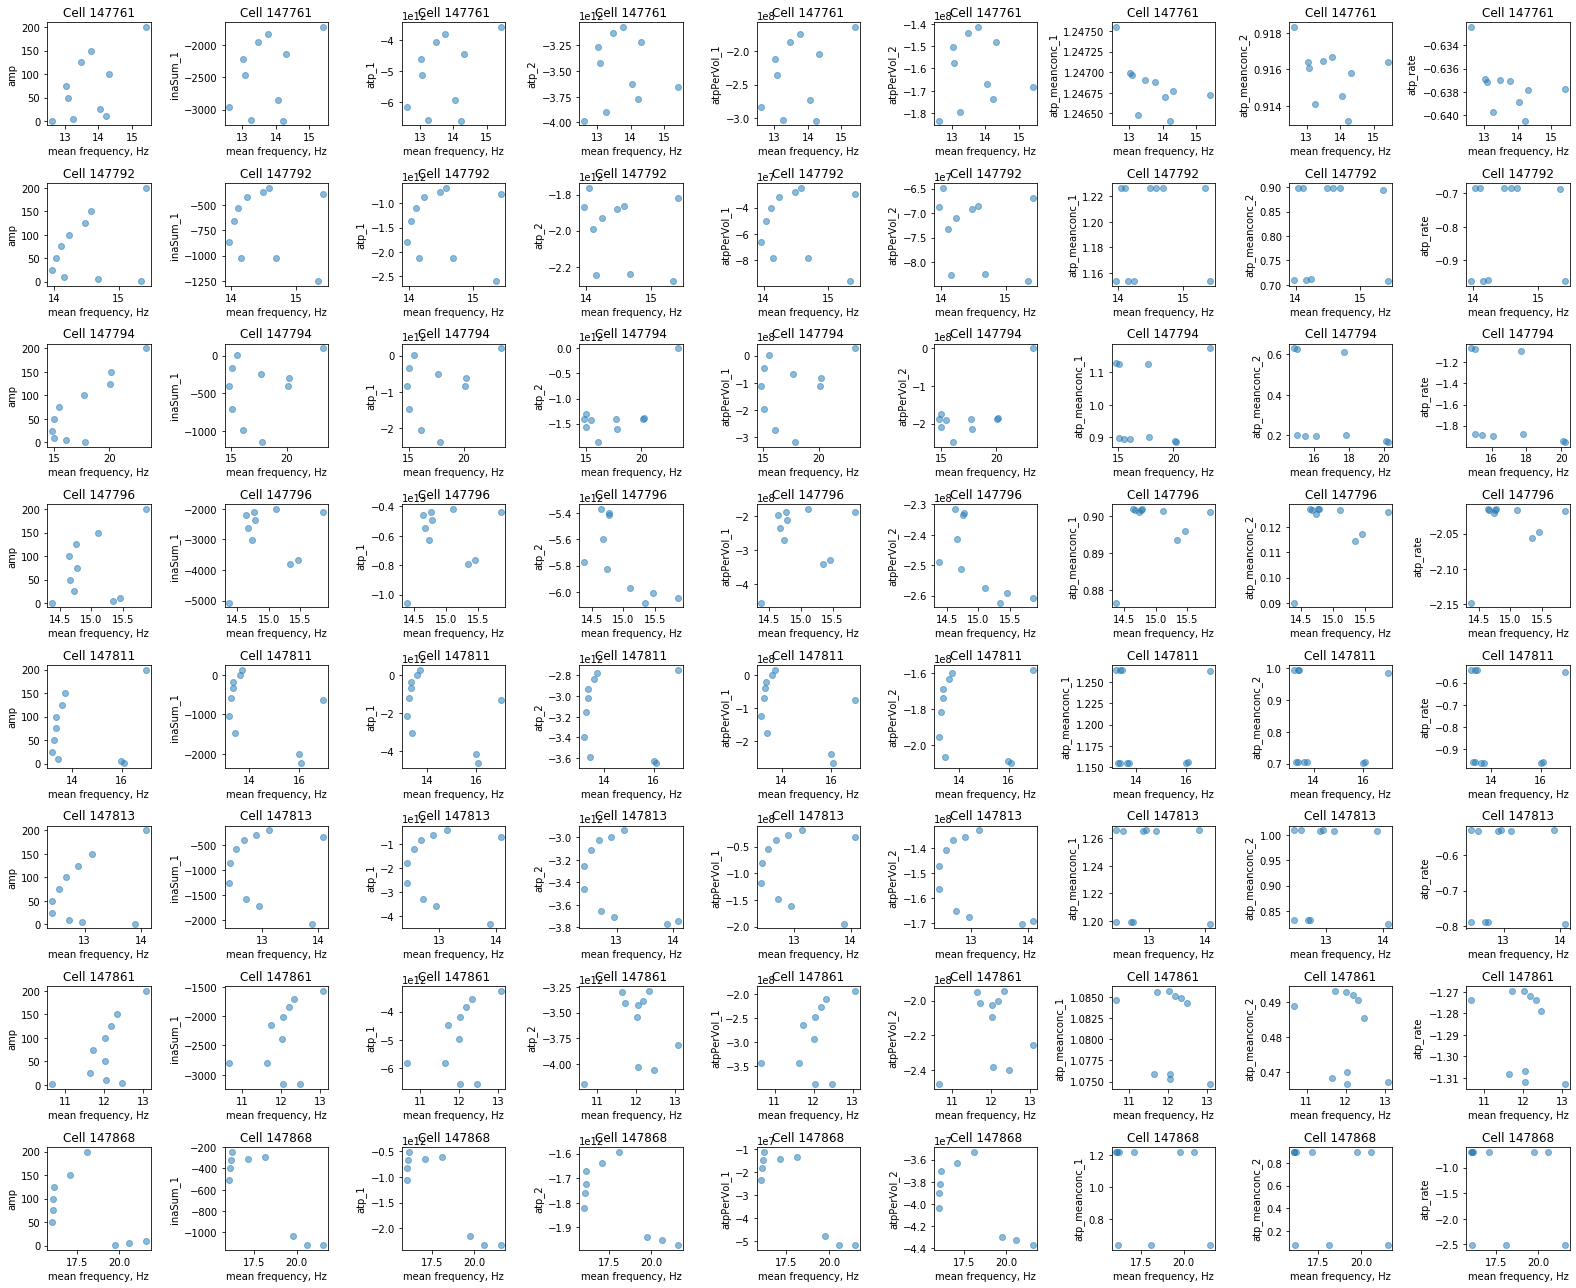

In [129]:
fig, axs = plt.subplots(8,9,figsize=(22,18))

for i,c in enumerate(['amp','inaSum_1','atp_1','atp_2','atpPerVol_1','atpPerVol_2','atp_meanconc_1','atp_meanconc_2','atp_rate']):
        
    x = i % 9
     
    for j,gids in enumerate(df.loc[df['etype_x']=='cADpyr','gid'][0:8]):
        
        y = j % 8
        
        axs[y, x].plot(df.loc[df['gid']==gids,'mean_frequency'],df.loc[df['gid']==gids,c], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
        axs[y, x].set_title(f'Cell {gids}')
        axs[y, x].set(xlabel='mean frequency, Hz', ylabel=c)

fig.tight_layout()

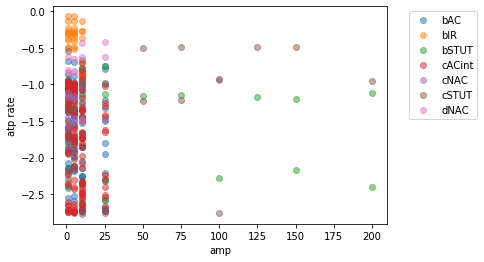

In [130]:
groups = df.loc[df['etype_x']!='cADpyr',:].groupby('etype_x')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group['amp'], group['atp_rate'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_xlabel('amp')
ax.set_ylabel('atp rate') 

plt.show()


In [131]:
df['atp_rate'].head(10)

0   -0.640443
1   -0.961491
2   -1.070382
3   -2.047723
4   -0.543459
5   -0.786661
6   -1.311736
7   -2.515310
8   -1.354893
9   -1.363810
Name: atp_rate, dtype: float64

In [ ]:
df['atp_rate'].max()

In [ ]:
df['atp_rate'].min()

In [105]:

atp_t = ATPConcAllCmps.transpose()
atp_t.columns = atp_t.loc['time',:]
atp_t.drop(atp_t.index[0], inplace=True)

atp_t = atp_t.reset_index()

atp_mean = atp_t.loc[:,['gid']].copy()
atp_mean['atp_rate']  = (atp_t.iloc[:,500] - atp_t.iloc[:,1])/0.5

In [103]:
atp_t.iloc[:,500]

0       0.989228
1       1.079778
2       1.068923
3       0.919254
4       0.864808
          ...   
2127    0.535289
2128    0.273995
2129    0.807030
2130    0.900650
2131    0.654863
Name: 499.0, Length: 2132, dtype: float64

In [106]:
atp_t.iloc[:,1]

0       1.399999
1       1.399999
2       1.399999
3       1.399999
4       1.399999
          ...   
2127    1.399999
2128    1.399999
2129    1.399999
2130    1.399999
2131    1.399999
Name: 0.0, Length: 2132, dtype: float64

In [102]:
atp_mean.head()

time     gid       atp_rate
0     147760 -295518.021545
1     147761 -295519.840444
2     147789 -295575.862154
3     147792 -295582.161492
4     147794 -295586.270384

In [100]:
sim_f = '/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/diff_pulses/amp1/BlueConfig'
sim = Simulation(sim_f)

report = sim.report('ATPConcAllCmps', source='h5') 
ATPConcAllCmps = report.get()
print("NUMBER OF COLUMNS:",len(ATPConcAllCmps.columns))

ATPConcAllCmps = ATPConcAllCmps.reset_index()

Have keys ({'FlushBufferScalar'}) that are not defined for section: Run
Ignoring unknown key: 'FlushBufferScalar'


NUMBER OF COLUMNS: 2132


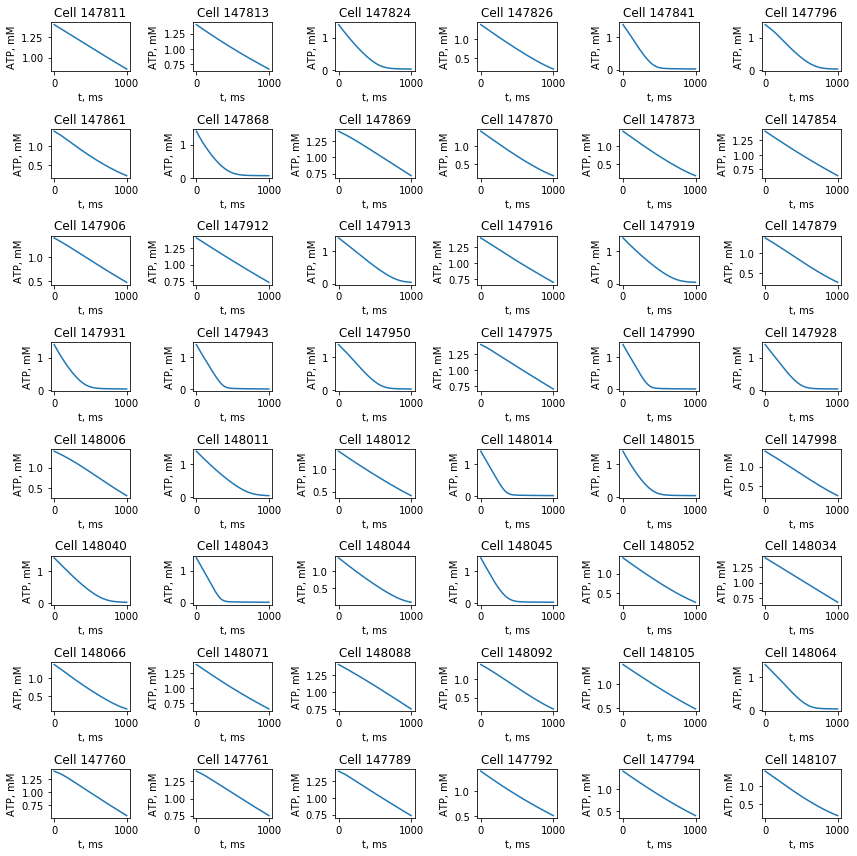

In [105]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(ATPConcAllCmps.iloc[:,0:49].columns):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(ATPConcAllCmps['time'],ATPConcAllCmps[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='ATP, mM')

fig.tight_layout()

In [114]:
sim_f = '/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/diff_pulses/amp4/BlueConfig'
sim = Simulation(sim_f)

report = sim.report('ATPConcAllCmps', source='h5') 
ATPConcAllCmps200 = report.get()
print("NUMBER OF COLUMNS:",len(ATPConcAllCmps200.columns))

ATPConcAllCmps200 = ATPConcAllCmps200.reset_index()

Have keys ({'FlushBufferScalar'}) that are not defined for section: Run
Ignoring unknown key: 'FlushBufferScalar'


NUMBER OF COLUMNS: 2132


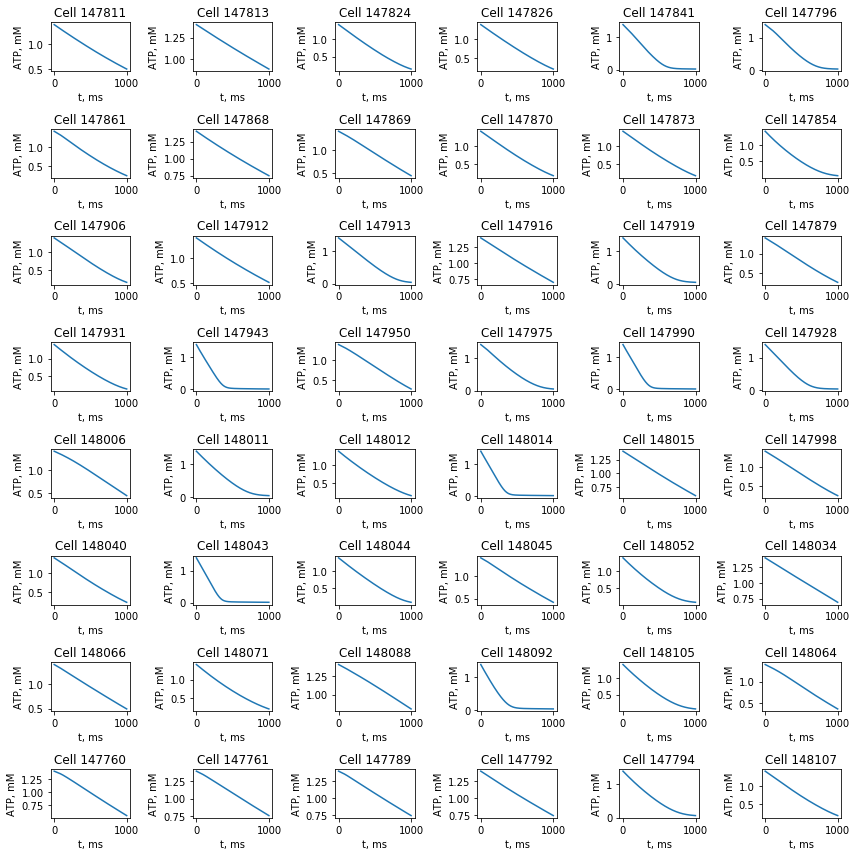

In [115]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(ATPConcAllCmps200.iloc[:,0:49].columns):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(ATPConcAllCmps200['time'],ATPConcAllCmps200[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='ATP, mM')

fig.tight_layout()

In [106]:
sim_f = '/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/diff_pulses/amp1/BlueConfig'
sim = Simulation(sim_f)

report = sim.report('soma', source='h5') 
soma = report.get()
print("NUMBER OF COLUMNS:",len(soma.columns))

Have keys ({'FlushBufferScalar'}) that are not defined for section: Run
Ignoring unknown key: 'FlushBufferScalar'


NUMBER OF COLUMNS: 2132


In [108]:
soma = soma.reset_index()

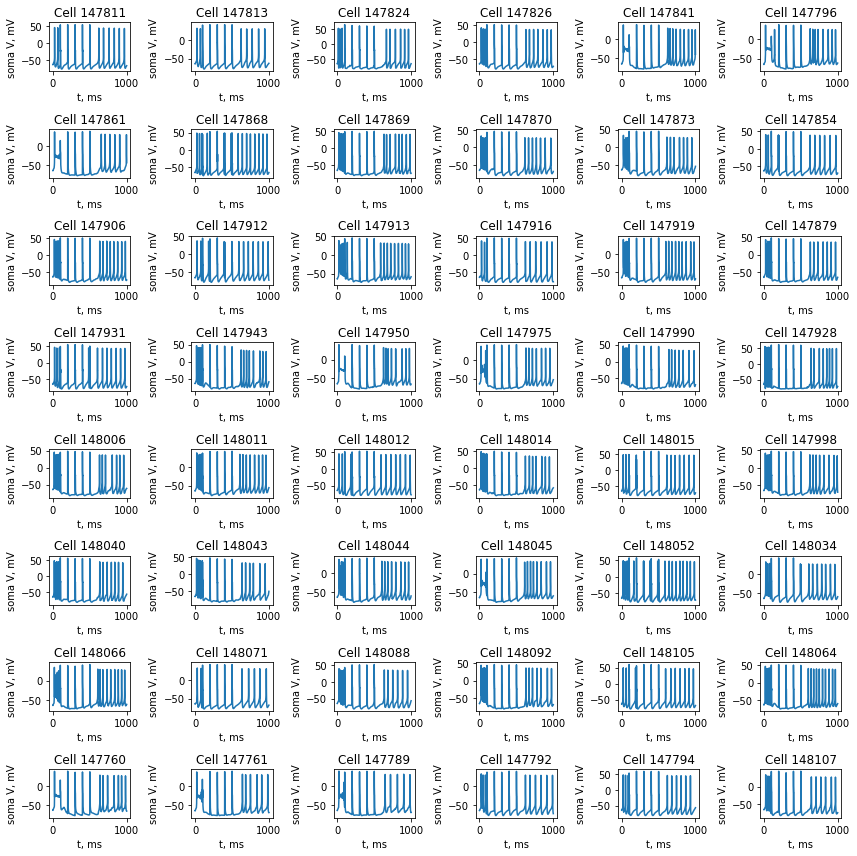

In [109]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(soma.iloc[:,0:49].columns):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(soma['time'],soma[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='soma V, mV')

fig.tight_layout()

In [112]:
sim_f = '/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/diff_pulses/amp4/BlueConfig'
sim = Simulation(sim_f)

report = sim.report('soma', source='h5') 
soma50 = report.get()

print("NUMBER OF COLUMNS:",len(soma200.columns))

soma50 = soma50.reset_index()

Have keys ({'FlushBufferScalar'}) that are not defined for section: Run
Ignoring unknown key: 'FlushBufferScalar'


NUMBER OF COLUMNS: 2133


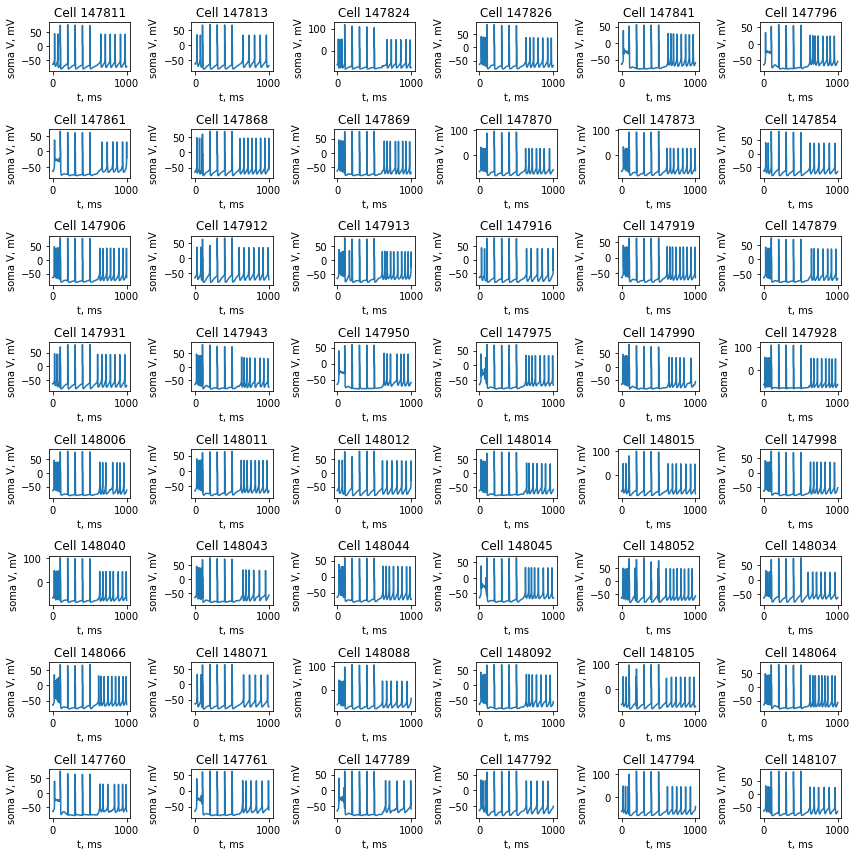

In [113]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(soma50.iloc[:,0:49].columns):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(soma50['time'],soma50[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='soma V, mV')

fig.tight_layout()

In [110]:
sim_f = '/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/diff_pulses/amp3/BlueConfig'
sim = Simulation(sim_f)

report = sim.report('soma', source='h5') 
soma200 = report.get()

print("NUMBER OF COLUMNS:",len(soma200.columns))

soma200 = soma200.reset_index()

Have keys ({'FlushBufferScalar'}) that are not defined for section: Run
Ignoring unknown key: 'FlushBufferScalar'


NUMBER OF COLUMNS: 2132


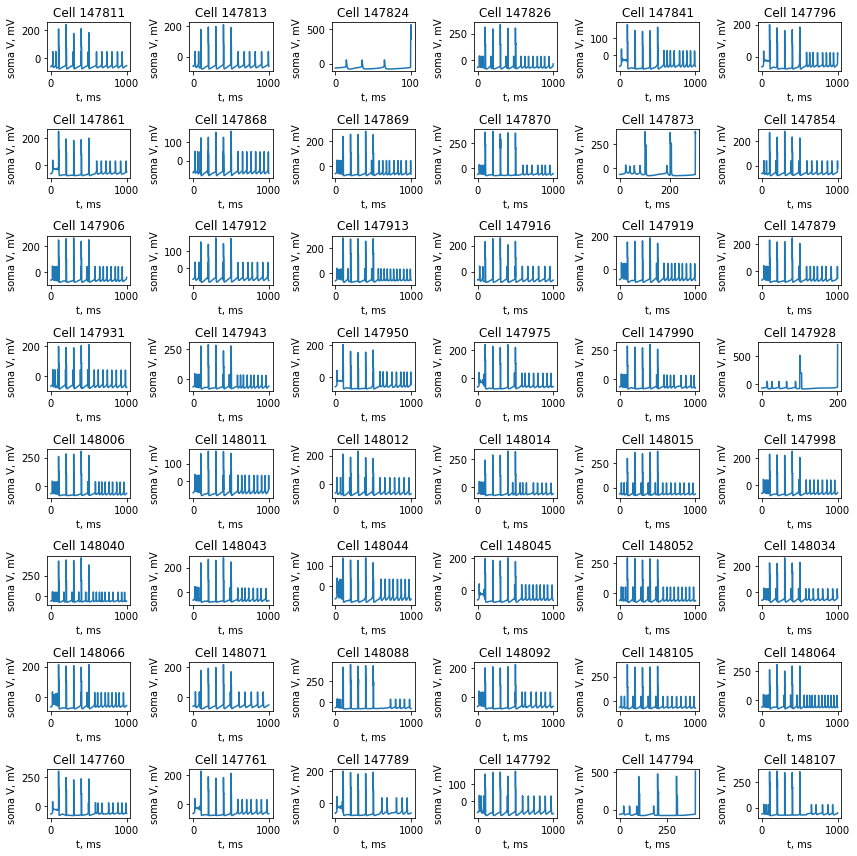

In [111]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(soma200.iloc[:,0:49].columns):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(soma200['time'],soma200[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='soma V, mV')

fig.tight_layout()